# 20.3 Data Storytelling: Case Study

# Imports

Import the necessary and appropriate packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
from datetime import datetime
import matplotlib.dates as mdates

# Dataset

The following dataset, titled <a href="https://cawpdata.rutgers.edu/women-elected-officials">"Women Elected Officials Database"</a> contains information on elected officials -- at congressional, statewide executive, and state legislative levels -- in the United States who identify as women. The database was obtained from the Center for American Women and Politics at Rutgers University.

In [3]:
df = pd.read_csv('search_officeholders-1652469794- all.csv')
df.head()

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,District,race_ethnicity
0,11841h,1981,Betty,S.,Aaron,Democrat,State Legislative,State Representative,Georgia - GA,NaN,Unavailable
1,11841h,1982,Betty,S.,Aaron,Democrat,State Legislative,State Representative,Georgia - GA,NaN,Unavailable
2,11841h,1983,Betty,S.,Aaron,Democrat,State Legislative,State Representative,Georgia - GA,NaN,Unavailable
3,11841h,1984,Betty,S.,Aaron,Democrat,State Legislative,State Representative,Georgia - GA,NaN,Unavailable
4,11841h,1985,Betty,S.,Aaron,Democrat,State Legislative,State Representative,Georgia - GA,NaN,Unavailable


# First Look At The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94289 entries, 0 to 94288
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              94289 non-null  object 
 1   Year            94289 non-null  int64  
 2   First Name      94289 non-null  object 
 3   Middle Name     60090 non-null  object 
 4   Last Name       94289 non-null  object 
 5   party           94289 non-null  object 
 6   Level           94289 non-null  object 
 7   Position        94289 non-null  object 
 8   state           94284 non-null  object 
 9   District        0 non-null      float64
 10  race_ethnicity  94289 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 7.9+ MB


Note that there are five missing values in the states column.

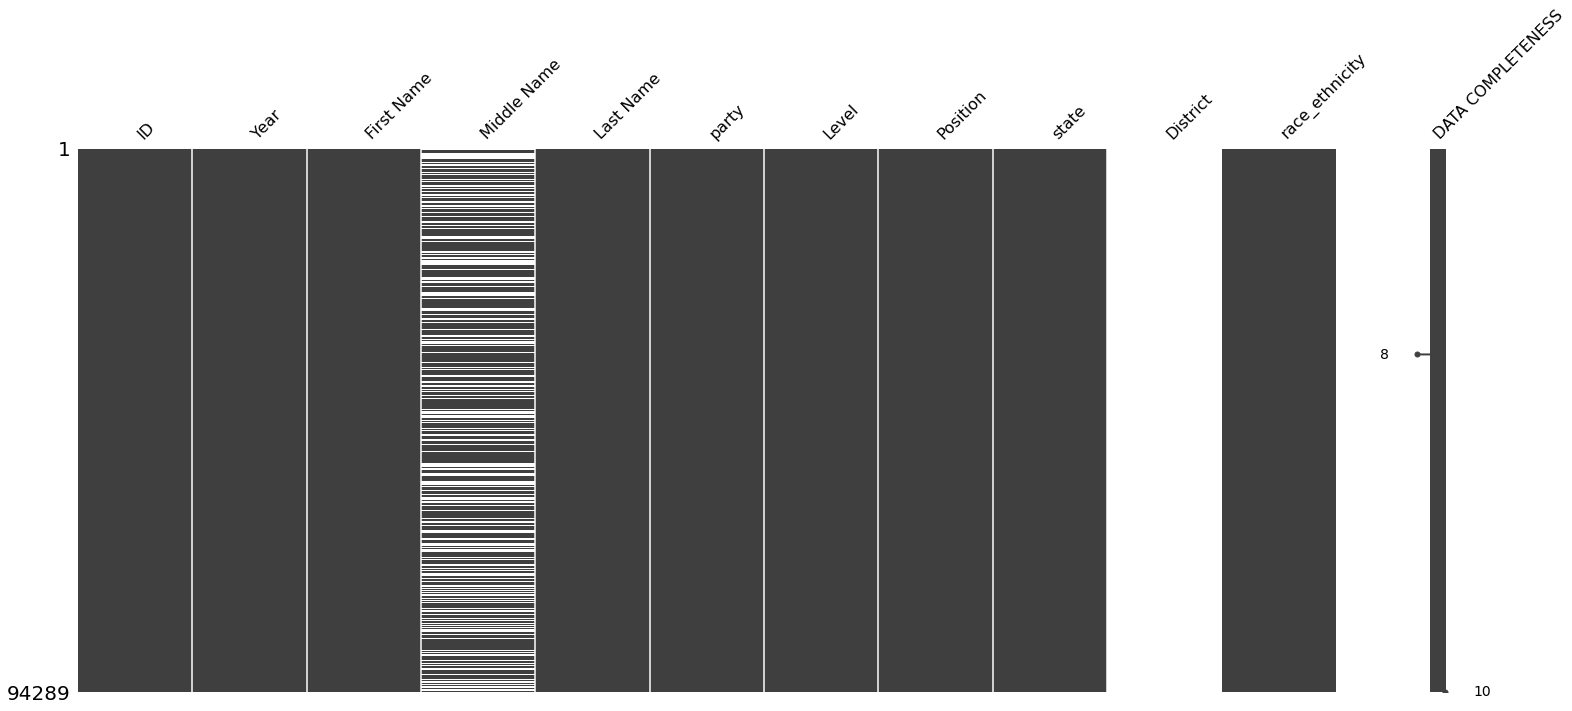

In [5]:
msno.matrix(df, labels = True)
plt.show()

The 'District' column seems to be completely empty. Additionally, the 'Middle Name' column appears to have some some empty rows. However, these could be a simply be a case of people not having middle names. Finally, there are 5 missing values in the 'state' column, as noted above. 

In [6]:
#Remove 'District' column
df.drop('District', axis=1, inplace=True)

In [7]:
#Explore rows with missing values in the 'state' column
df[df['state'].isnull()]

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,race_ethnicity
35690,314474k,2021,Kamala,NaN,Harris,Democrat,Federal Executive,Vice President,NaN,"Black, Asian American/Pacific Islander"
35691,314474k,2022,Kamala,NaN,Harris,Democrat,Federal Executive,Vice President,NaN,"Black, Asian American/Pacific Islander"
35692,314474k,2023,Kamala,NaN,Harris,Democrat,Federal Executive,Vice President,NaN,"Black, Asian American/Pacific Islander"
35693,314474k,2024,Kamala,NaN,Harris,Democrat,Federal Executive,Vice President,NaN,"Black, Asian American/Pacific Islander"
35694,314474k,2025,Kamala,NaN,Harris,Democrat,Federal Executive,Vice President,NaN,"Black, Asian American/Pacific Islander"


From the above, we see that current Vice President Kamala Harris is the only person who was not assigned a state. This is because the position of Vice President is a national one. Because of this, we will continue to keep these rows in the dataframe.

The above also shows us that there are a number of rows that contain the same person and their ID number because they served (or, are to serve) multiple terms. 

In [8]:
np.count_nonzero(df['ID'].unique())

12105

This means that there are 12,105 unique women who have served in public office so far. 

In [9]:
df.nunique()

ID                12105
Year                134
First Name         2166
Middle Name        1170
Last Name          7179
party                17
Level                 5
Position             31
state                56
race_ethnicity       25
dtype: int64

The above tells us the following information:<br>
• There are 12,105 unique women who have held public office <br>
• Women have, in total, held public office for 134 years (and will continue to hold) <br>
• There are 17 political parties represented in this dataset <br>
• Women have held public office at 5 different levels <br>
<br>
<b>Note:</b> The dataset reflects that there are "56" unique states that have had women in public office. Note that in this dataset, the '<em>states</em>' column takes into account the 50 states of the United States, the permanently inhabited & unincorporated 5 territories, and an NaN value due to Kamala Harris's national position as Vice President. 

Below is a new dataframe created to contain only unique women who have held public office

In [10]:
#create new dataframe with unique women
df_unique = df.drop_duplicates(subset=['ID'])

In [11]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12105 entries, 0 to 94285
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              12105 non-null  object
 1   Year            12105 non-null  int64 
 2   First Name      12105 non-null  object
 3   Middle Name     7165 non-null   object
 4   Last Name       12105 non-null  object
 5   party           12105 non-null  object
 6   Level           12105 non-null  object
 7   Position        12105 non-null  object
 8   state           12105 non-null  object
 9   race_ethnicity  12105 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.0+ MB


# EDA

## Number of Women as Officeholders, by Party

In [12]:
df_unique['party'].value_counts()

Democrat                          6783
Republican                        5107
Nonpartisan                        110
Independent                         39
Third party                         16
Partido Nuevo Progresista           16
Partido Popular Democratico         13
Progressive                          7
Non Partisan League                  4
Independent Voters Association       3
Socialist                            2
Populist                             2
Teller Silver Republican             1
Silver Republican                    1
Farm-Labor                           1
Name: party, dtype: int64

In total, the Democratic party seems to have the highest total number of women as office holders at 6,783.

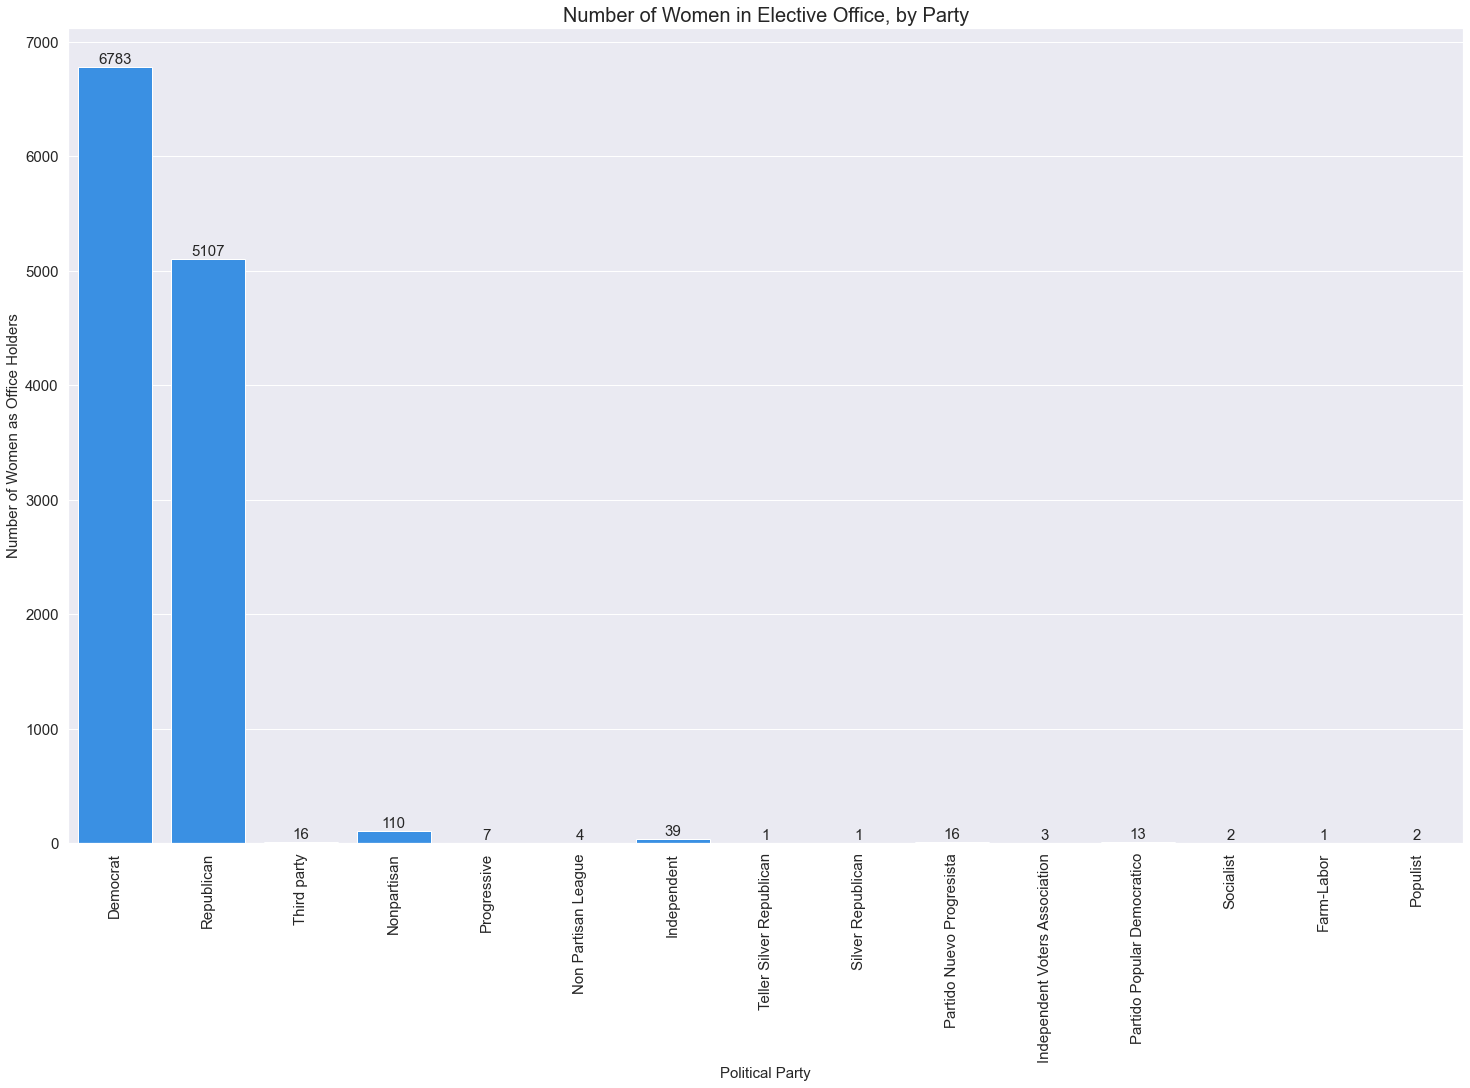

In [13]:
sns.set(rc={"figure.figsize":(25, 15)})
ax1 = sns.countplot(x=df_unique['party'], color='dodgerblue')

ax1.bar_label(ax1.containers[0], fontsize=15)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Number of Women as Office Holders', fontsize=15)
plt.xlabel('Political Party', fontsize=15)

plt.title("Number of Women in Elective Office, by Party", fontsize=20);

Thus, we see that the four major parties seem to be Democrat, Republican, Nonpartisan and Independent. Democrats hold the highest number of women as office holders, followed by Republicans.

Between the two major parties, there is a difference of 1,676 women. There have been <b>32.8% more Democrat women who have hold office than Republican women.</b>

Another way to represent this:

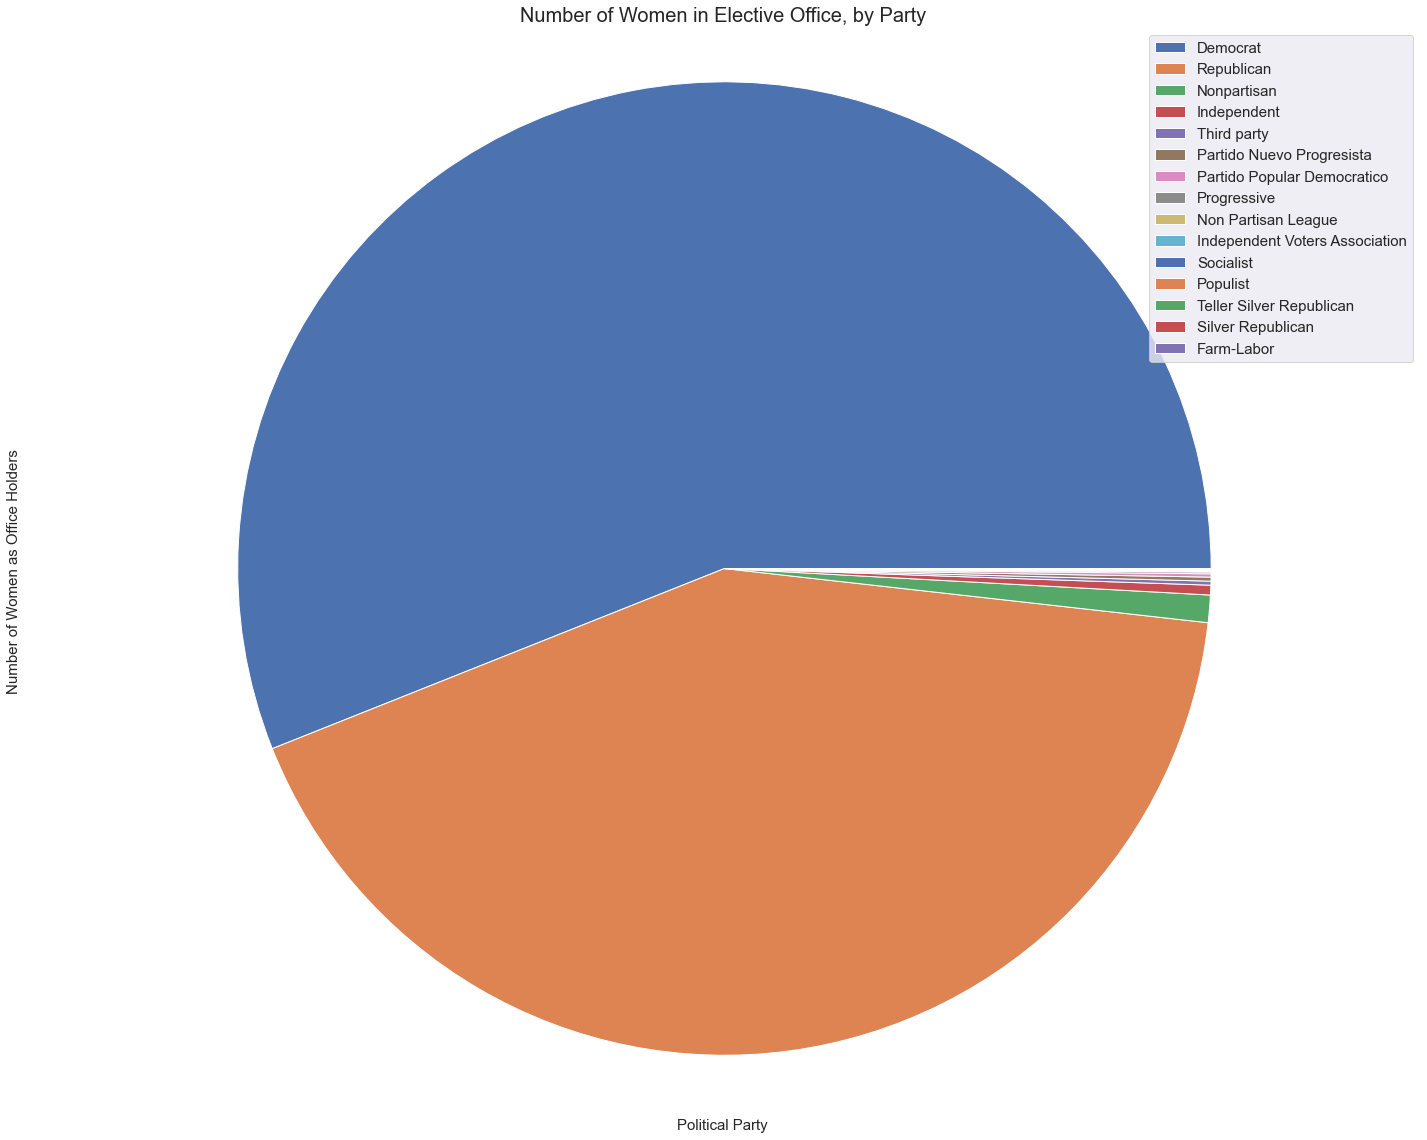

In [14]:
plt.rcParams["figure.figsize"] = [25, 20]

patches1, texts1 = plt.pie(df_unique['party'].value_counts())
plt.legend(patches1, df_unique['party'].value_counts().index, loc="best", fontsize=15)
plt.axis('equal')

plt.ylabel('Number of Women as Office Holders', fontsize=15)
plt.xlabel('Political Party', fontsize=15)

plt.title("Number of Women in Elective Office, by Party", fontsize=20);

plt.show()

## Number of Women as Officeholders by Level

In [15]:
df_unique['Level'].value_counts()

State Legislative      11153
Statewide Executive      514
Congress                 360
Territorial/D.C.          78
Name: Level, dtype: int64

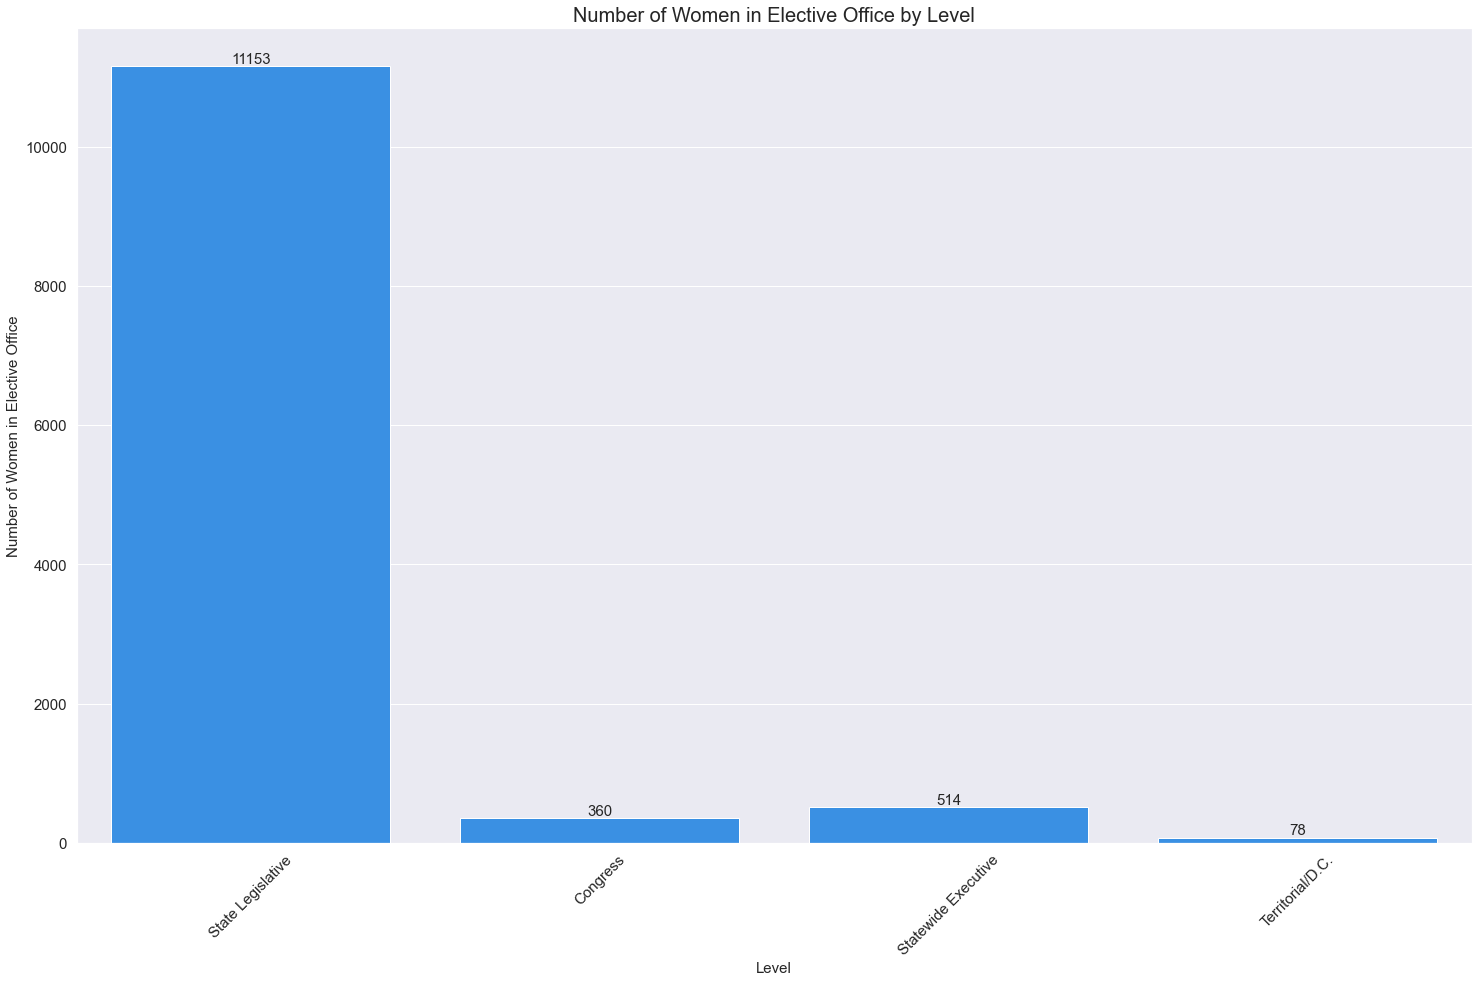

In [16]:
sns.set(rc={"figure.figsize":(25, 15)})

ax2 = sns.countplot(x=df_unique['Level'],color='dodgerblue')

ax2.bar_label(ax2.containers[0], fontsize=15)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=45);

plt.ylabel('Number of Women in Elective Office', fontsize=15)
plt.xlabel('Level', fontsize=15)

plt.title("Number of Women in Elective Office by Level", fontsize=20);

At first sight, it would appear that there is a large number of women who have held office at the State Legislative level. However, it is important to keep relativity and perspectives in mind. There are more state legislators in total than any other position in the above plot. 

According to the CAWP website, the term <em>Statewide Executive</em> includes "offices that are elected on a statewide basis for executive positions. These do not include executive positions that are appointed or that are elected by district. These offices change from year to year and by state based on state constitutions, causing variance in which offices you will see reflected in our database over time."

The <a href="https://history.house.gov/Institution/Total-Members/Total-Members/">U.S. House of Representatives' website</a> states that since 1789, when the first Congress convened, "12,421 individuals have served as Representatives, Senators, or in both capacities."
<br>
According to our data, there have been 360 unique women who have served in Congress over the years. Thus, that would be <b>2.9% of the total number of senators and representatives</b> in U.S. history.

## Number of Women in Elective Office by Position

In [17]:
df_unique['Position'].value_counts()

State Representative                         9447
State Senator                                1706
U.S. Representative                           304
Secretary of State                            109
Superintendent of Public Instruction           87
Treasurer                                      76
Lt. Governor                                   71
Territorial/D.C. Senator                       51
U.S. Senator                                   49
Auditor                                        43
Attorney General                               33
Governor                                       26
Territorial/D.C. Representative                24
Corporation Commissioner                       15
Public Service Commissioner                    12
Comptroller                                    12
U.S. Delegate                                   7
Public Utilities Commissioner                   5
Agriculture                                     5
Insurance Commissioner                          5


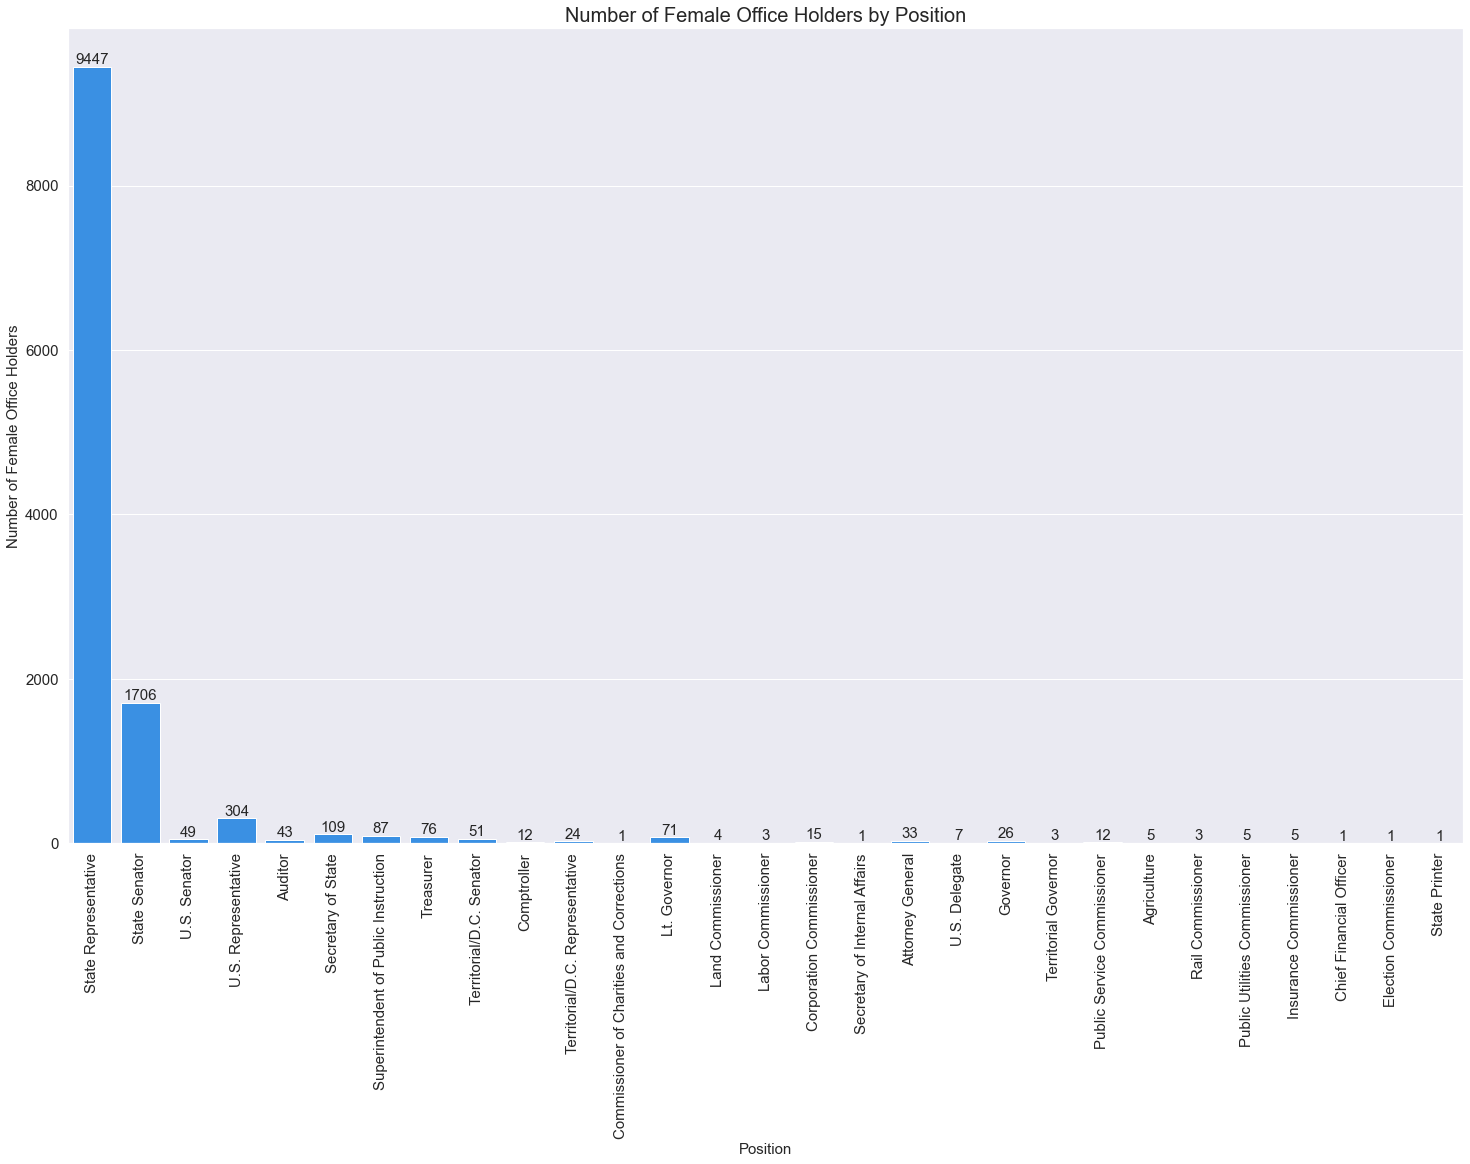

In [18]:
sns.set(rc={"figure.figsize":(25, 15)})

ax3 = sns.countplot(x=df_unique['Position'],color='dodgerblue')

ax3.bar_label(ax3.containers[0], fontsize=15)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=15)
plt.xlabel('Position', fontsize=15)

plt.title("Number of Female Office Holders by Position", fontsize=20);

Similar to the 'Level' column, it is important to keep in mind that there are more State Representatives/State Senators as a whole than Representatives and Senators at a national level. 

The <a href="https://history.house.gov/Institution/Total-Members/Total-Members/">U.S. House of Representatives' website</a> states that since 1789, when the first Congress convened, "[t]here have been 10,427 Members who served only as Representatives, 1,314 Members who served only in the Senate, and 680 Members with service in both chambers." That would mean that there have been 11,107 Representatives and 1,994 Senators.  

According to our data, there have been 304 unique women who have served as U.S. Representatives and 49 who have served as U.S. Senators over the years. Thus, that would be <b>2.7% of the total number of representatives</b> and <b>2.4% of the total number of senators</b> in U.S. history.

## Number of Women in Elective Office by State

In [19]:
df_unique['state'].isnull().values.sum()

0

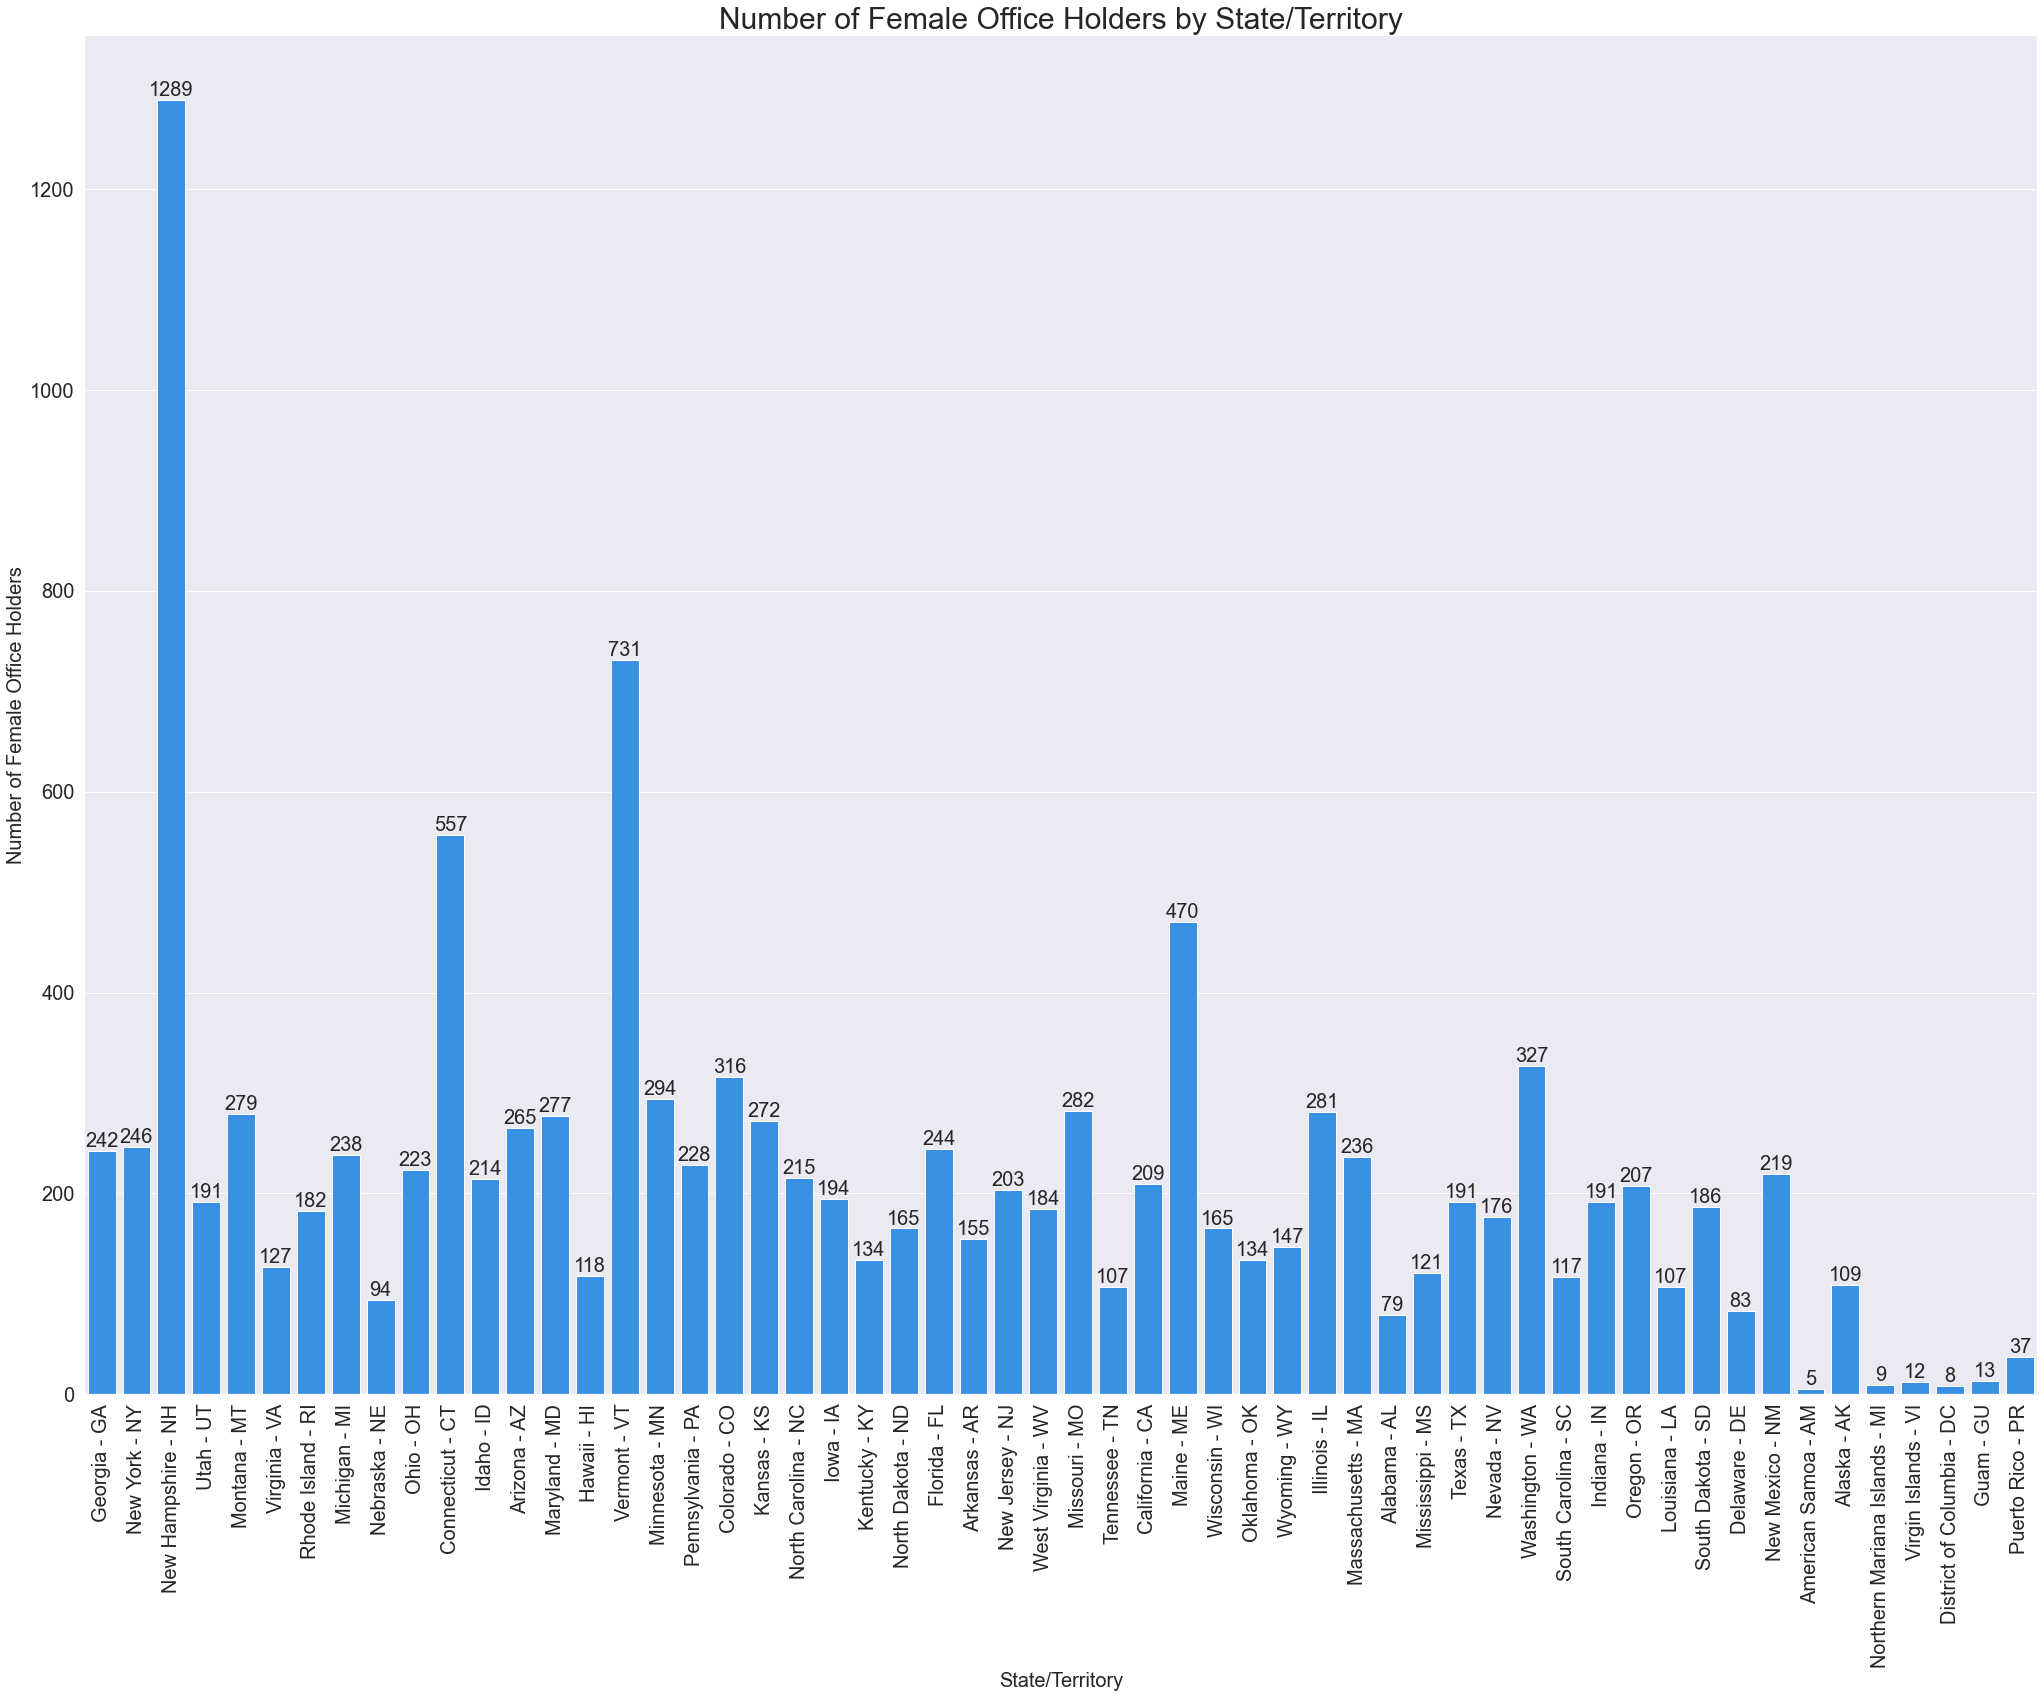

In [20]:
sns.set(rc={"figure.figsize":(35, 25)})

ax4 = sns.countplot(x=df_unique['state'],color='dodgerblue')

ax4.bar_label(ax4.containers[0], fontsize=20)

plt.yticks(fontsize=20, rotation=0);
plt.xticks(fontsize=20, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=20)
plt.xlabel('State/Territory', fontsize=20)

plt.title("Number of Female Office Holders by State/Territory", fontsize=30);

Thus, among the 50 states of the US, we see that New Hampshire has elected the most number of women to hold public office. It is followed by Vermont, Connecticut, and Maine. 
<br>
• Conversely, Alabama, Delaware and Nebraska have had the least number of female officeholders. 
<br>
• Among the territories, Puerto Rico has the highest representation of women in public office while D.C. has the lowest. 
<br><br>
However, it is, once again, important to keep relativity in mind. The total number of seats available to run are different for each state and have changed over the years. 

<b>Note:</b> The dataset, according to the CAWP website, includes data on women elected officials at the sub-national level from the U.S. territories and the Washington, D.C. City Council <b>only from 2018 to present</b>.
<br><br>
<b>Note:</b> Vice President Kamala Harris is not included in this graph because the 'state" column in her instance contains missing 'values as her position is at a national level.

### State Breakdown For U.S. Representatives and U.S. Senators

In [21]:
#us senators
us_senators = df_unique[df_unique['Position']=='U.S. Senator']

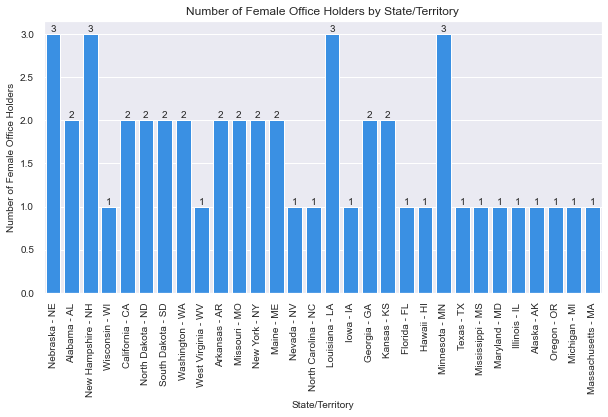

In [22]:
sns.set(rc={"figure.figsize":(10, 5)})

ax5 = sns.countplot(x=us_senators['state'],color='dodgerblue')

ax5.bar_label(ax5.containers[0], fontsize=10)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=10)
plt.xlabel('State/Territory', fontsize=10)

plt.title("Number of Female Office Holders by State/Territory", fontsize=12);

In [24]:
#us representatives
us_reps = df_unique[df_unique['Position']=='U.S. Representative']

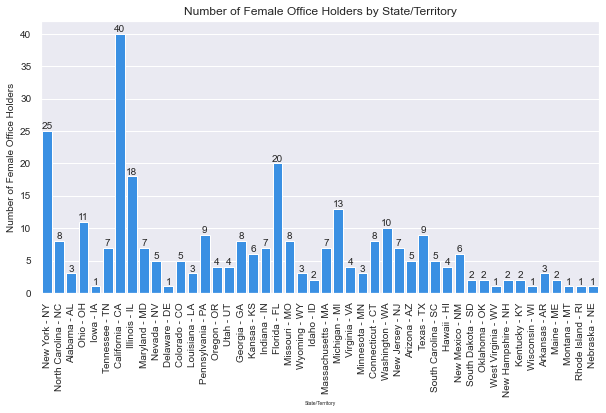

In [25]:
sns.set(rc={"figure.figsize":(10, 5)})

ax6 = sns.countplot(x=us_reps['state'],color='dodgerblue')

ax6.bar_label(ax6.containers[0], fontsize=10)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=10)
plt.xlabel('State/Territory', fontsize=5)

plt.title("Number of Female Office Holders by State/Territory", fontsize=12);

California has had the most number of women serve as U.S. Representatives, followed by New York, Florida and Illinois. The least number of women as U.S. Representatives have come from Iowa, Delaware, West Virginia, Wisconsin, Montana, Rhode Island, and Nebraska.

## Number of Women in Elective Office By Race

According to the CAWP website: "We determine officeholders’ racial/ethnic identification by relying on historical records, contemporary public records, and officeholder self-identification. Public records include interviews and website or other available biographies. We also contact current officeholders directly to confirm their preferred racial/ethnic identification. We label officeholders for whom we were unable to determine racial identification as 'unavailable.'" 
<br><br> 
Further, "<b>[w]e strongly caution against adding totals from each racial/ethnic group, as it will double count officeholders.</b>"

In [26]:
df_unique['race_ethnicity'].value_counts()

White                                                                  6148
Unavailable                                                            4475
Black                                                                   827
Latina                                                                  357
Asian American/Pacific Islander                                         147
Native American/Alaska Native/Native Hawaiian                            74
White, Latina                                                            12
Middle Eastern/North African                                             11
White, Asian American/Pacific Islander                                   10
White, Native American/Alaska Native/Native Hawaiian                      8
Black, Latina                                                             7
White, Black                                                              7
Latina, Asian American/Pacific Islander                                   3
Black, Asian

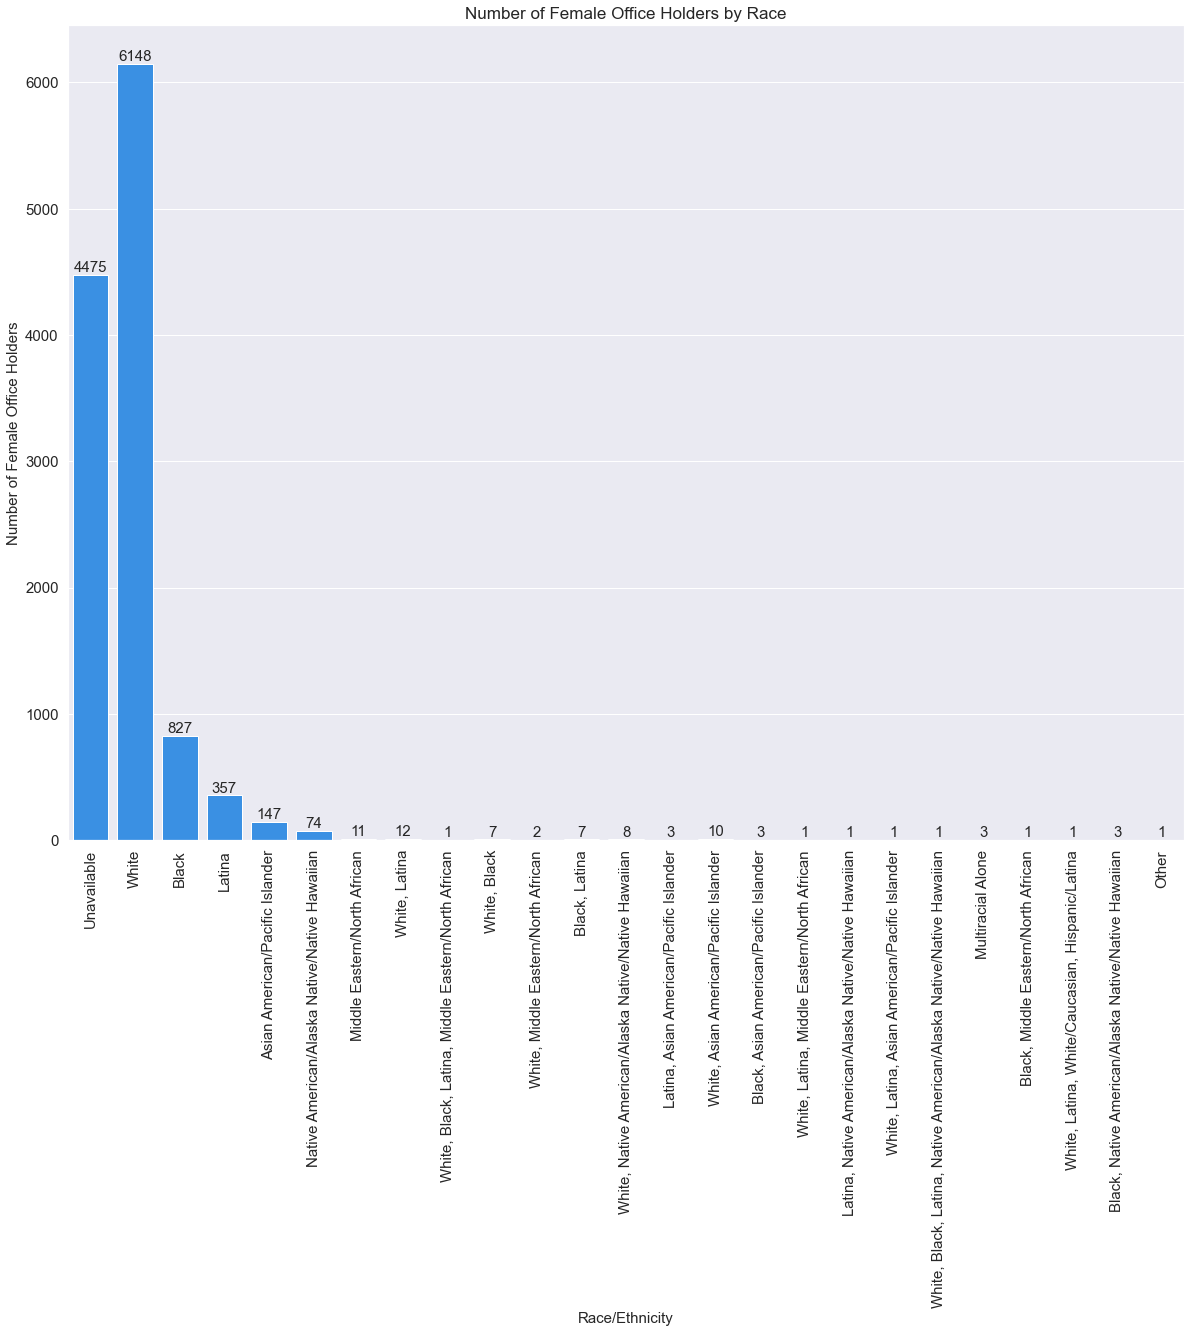

In [27]:
sns.set(rc={"figure.figsize":(20, 15)})

ax7 = sns.countplot(x=df_unique['race_ethnicity'],color='dodgerblue')

ax7.bar_label(ax7.containers[0], fontsize=15)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=15)
plt.xlabel('Race/Ethnicity', fontsize=15)

plt.title("Number of Female Office Holders by Race", fontsize=17);

It is important to remember that these races and ethnicities are what the office holders self-identify as, as according to the website from where the data has been sourced.
<br><br>
Keeping that in mind, it will be noted that the largest number of female office holders self-identify as White (54,654). Additionally, the second largest number belongs to the category 'Unavailable' at 26,155. This means that there is no information on how a large number of the women identify.
<br><br>
Additionally, the CAWP states that, in the dataset, "[r]acial/ethnic identification is available for all congressional and statewide elected executive officeholders. For state legislative officeholders, racial/ethnic identification is available for all state legislators from 1997 to present; partial race/ethnicity data is available in earlier years."

The following is an attempt to group women who self-identify with more than one race or ethnicity with each group they identify. The women who self-identify as "multiracial" will remain so. 

In [28]:
white = df_unique.race_ethnicity.str.count("White").sum()
black = df_unique.race_ethnicity.str.count("Black").sum()
latina = df_unique.race_ethnicity.str.count("Latina").sum()
aapi = df_unique.race_ethnicity.str.count("Asian American/Pacific Islander").sum()
unavailable = df_unique.race_ethnicity.str.count("Unavailable").sum()
native = df_unique.race_ethnicity.str.count("Native American/Alaska Native/Native Hawaiian").sum()
mena = df_unique.race_ethnicity.str.count("Middle Eastern/North African").sum()
multiracial = df_unique.race_ethnicity.str.count("Multiracial Alone").sum()
other = df_unique.race_ethnicity.str.count("Other").sum()

In [29]:
list_rac_eth = [
    ["White", white], 
    ["Black", black], 
    ["Latina", latina], 
    ["Asian American/Pacific Islander", aapi], 
    ["Unavailable", unavailable], 
    ["Native American/Alaska Native/Native Hawaiian", native], 
    ["Middle Eastern/North African", mena], 
    ["Multiracial Alone", multiracial], 
    ["Other", other]
]

In [30]:
df_rac_eth = pd.DataFrame(list_rac_eth)

In [31]:
df_rac_eth.reset_index()

,index,0,1
0,0,White,6193
1,1,Black,850
2,2,Latina,386
3,3,Asian American/Pacific Islander,164
4,4,Unavailable,4475
5,5,Native American/Alaska Native/Native Hawaiian,87
6,6,Middle Eastern/North African,16
7,7,Multiracial Alone,3
8,8,Other,1


In [32]:
df_rac_eth.rename(columns = {0:'race/ethnicity', 1:'number_of_women_officeholders'}, inplace = True)

This dataframe gives us the total number of women who identify with the above races and/or ethnicities. If women identified with more than one race and/or ethnicity, and specified them, they were counted under each of the races and/or ethnicities.

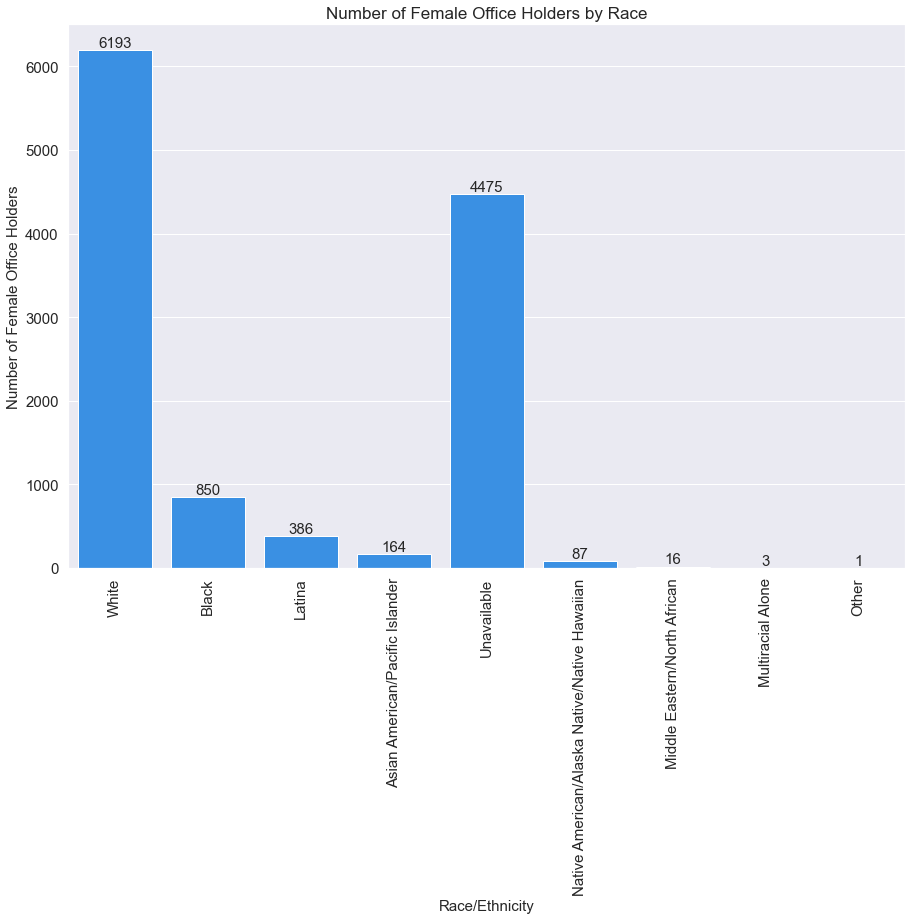

In [33]:
sns.set(rc={"figure.figsize":(15, 10)})

#ax = sns.countplot(x=df_rac_eth,color='dodgerblue')
ax8 = sns.barplot(x="race/ethnicity", y="number_of_women_officeholders", data=df_rac_eth, color='dodgerblue')

ax8.bar_label(ax8.containers[0], fontsize=15)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=15)
plt.xlabel('Race/Ethnicity', fontsize=15)

plt.title("Number of Female Office Holders by Race", fontsize=17);

Thus, there were more White women who served in public office than any other race/ethnicity. 
<br>
Notably, the second largest number belongs to the cateogry "Unavailable."
<br><br>
The disparity in the number of officeholders between those women who identify as "White" and those women who identify as "Black" or "Latina" is also significant.
<br><br>
The smallest number, excluding those who self-identified as multiracial only or "other," belongs to Middle Eastern/North African. 

## Number of Women of Color That Are Holding/Have Held Office

To calculate the number of women of color, we will consider all the rows that are not white or unavailable.

In [34]:
#make a dataframe from df_rac_eth
df_woc_2 = df_rac_eth.drop(df_rac_eth[df_rac_eth['race/ethnicity'] == 'White'].index)
df_woc_2 = df_woc_2.drop(df_woc_2[df_woc_2['race/ethnicity'] == 'Unavailable'].index)

In [35]:
df_woc_2

,race/ethnicity,number_of_women_officeholders
1,Black,850
2,Latina,386
3,Asian American/Pacific Islander,164
5,Native American/Alaska Native/Native Hawaiian,87
6,Middle Eastern/North African,16
7,Multiracial Alone,3
8,Other,1


In [36]:
df_woc_2['number_of_women_officeholders'].sum()

1507

The total number of women of color in this dataset is 1,507. 
<br>
Thus, this is 12.45% of the total women in the dataset that self-identify as a person of color.

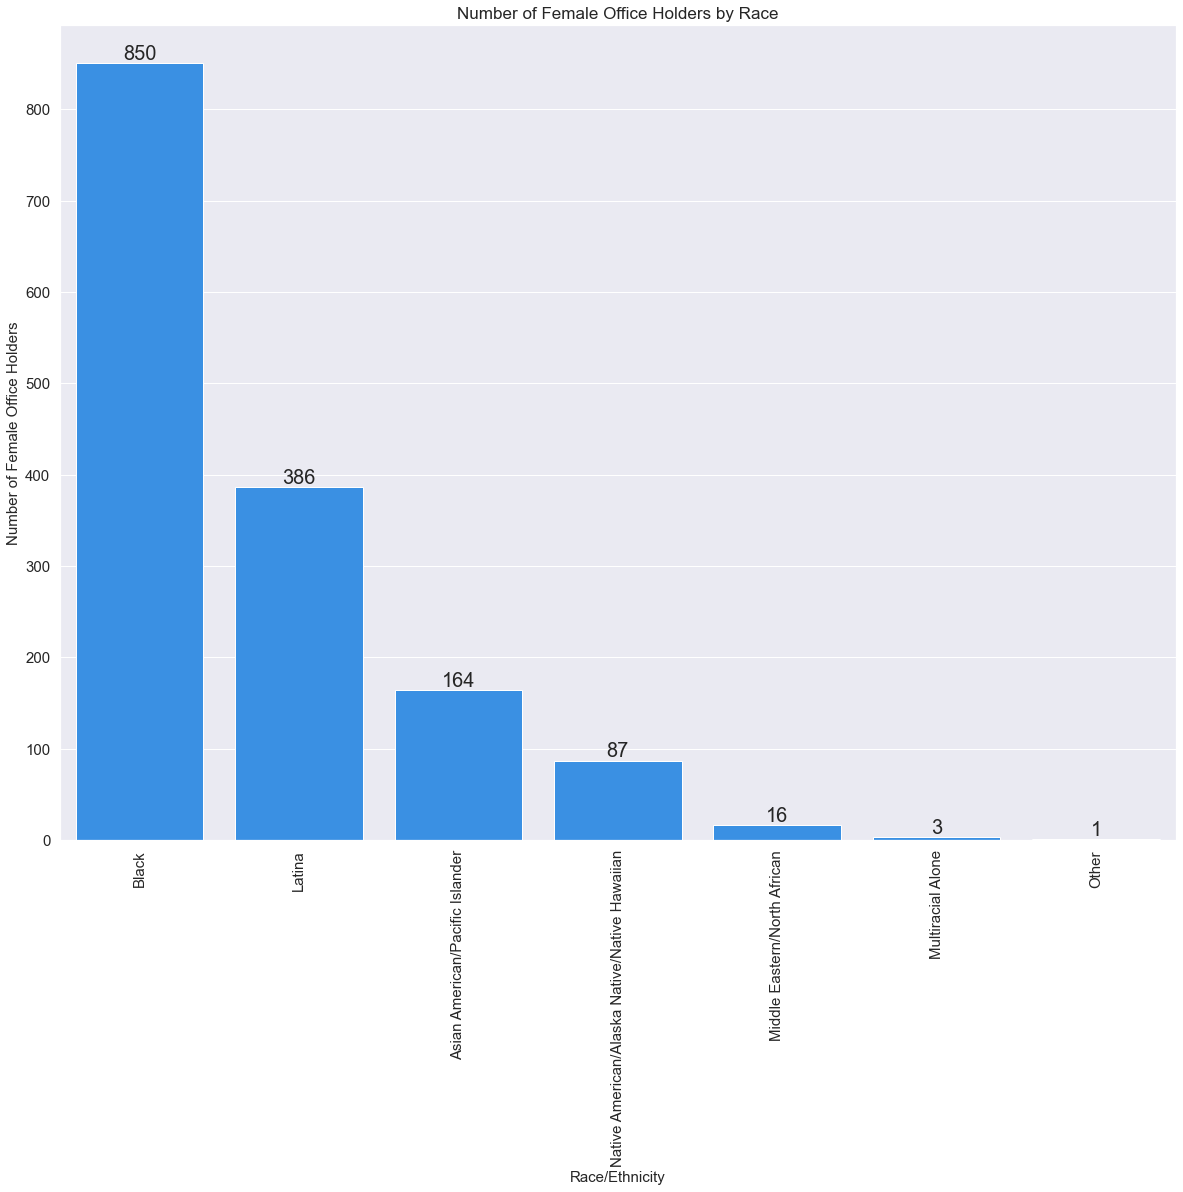

In [37]:
sns.set(rc={"figure.figsize":(20, 15)})

ax9 = sns.barplot(x="race/ethnicity", y="number_of_women_officeholders", data=df_woc_2, color='dodgerblue')

ax9.bar_label(ax9.containers[0], fontsize=20)

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=15)
plt.xlabel('Race/Ethnicity', fontsize=15)

plt.title("Number of Female Office Holders by Race", fontsize=17);

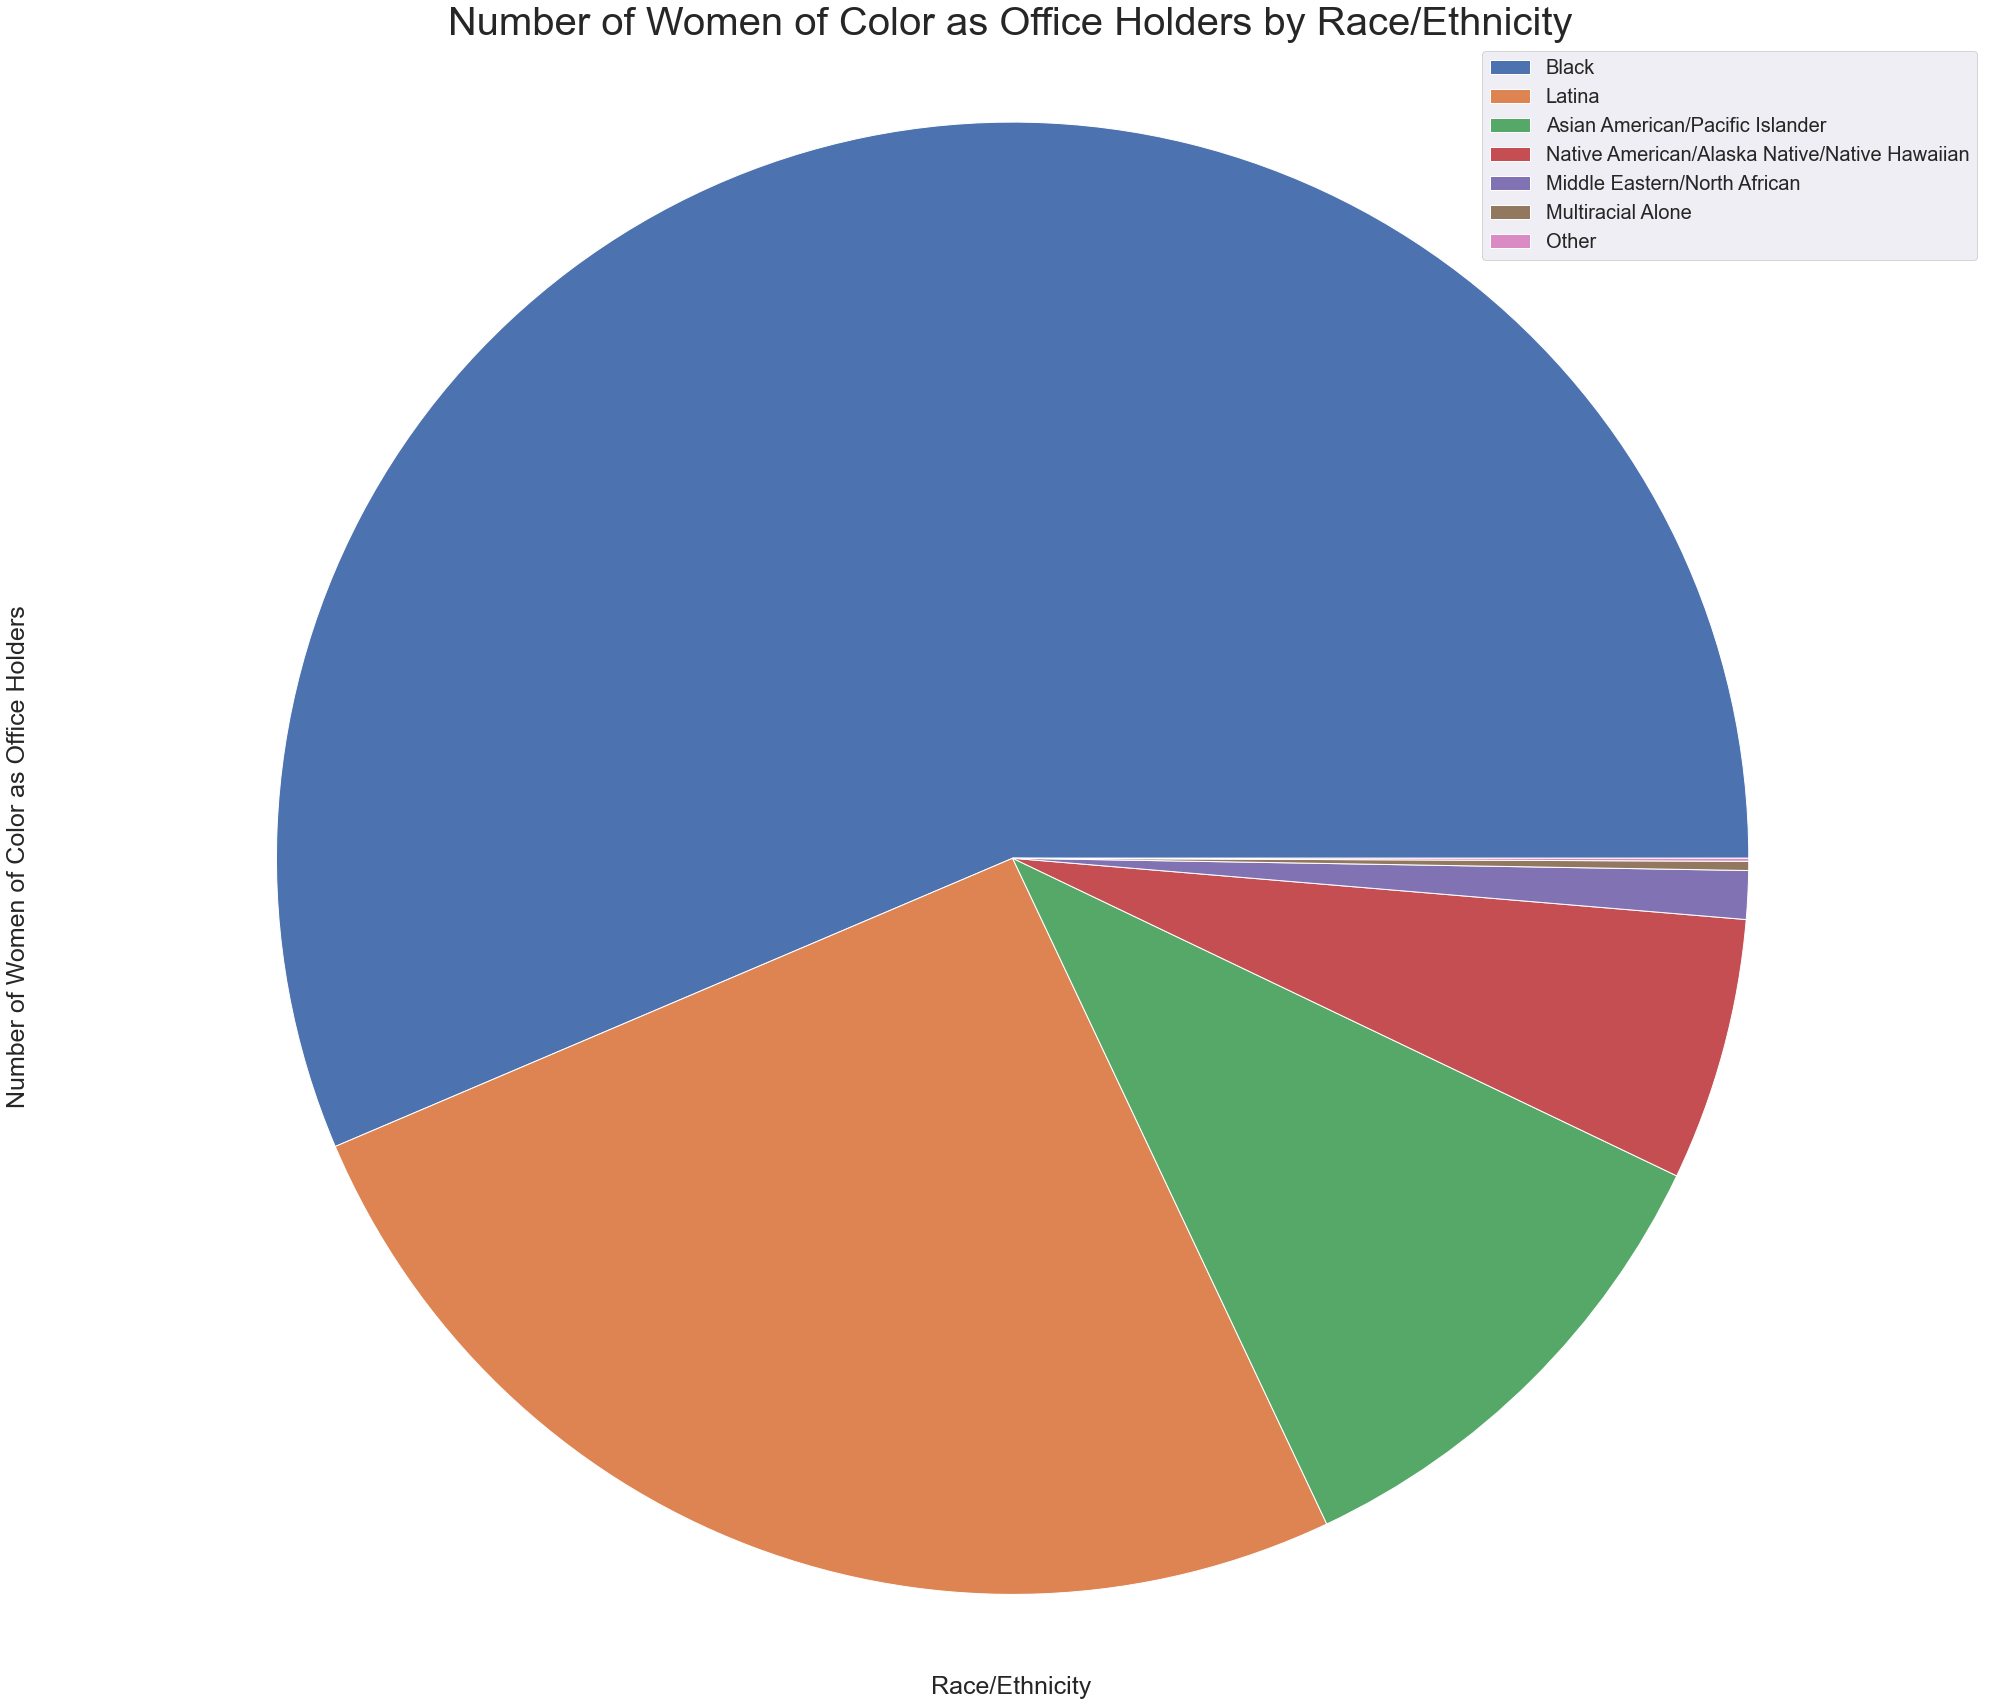

In [38]:
plt.rcParams["figure.figsize"] = [35, 30]

patches2, texts = plt.pie(df_woc_2['number_of_women_officeholders'])
plt.legend(patches2, df_woc_2['race/ethnicity'].value_counts().index, loc="best", fontsize=20)
plt.axis('equal')

plt.ylabel('Number of Women of Color as Office Holders', fontsize=25)
plt.xlabel('Race/Ethnicity', fontsize=25)

plt.title("Number of Women of Color as Office Holders by Race/Ethnicity", fontsize=40);

plt.show()

Black female officeholders make up the largest majority of the women of color serving in public office. 

## Number of Women in Elective Office Over the Years

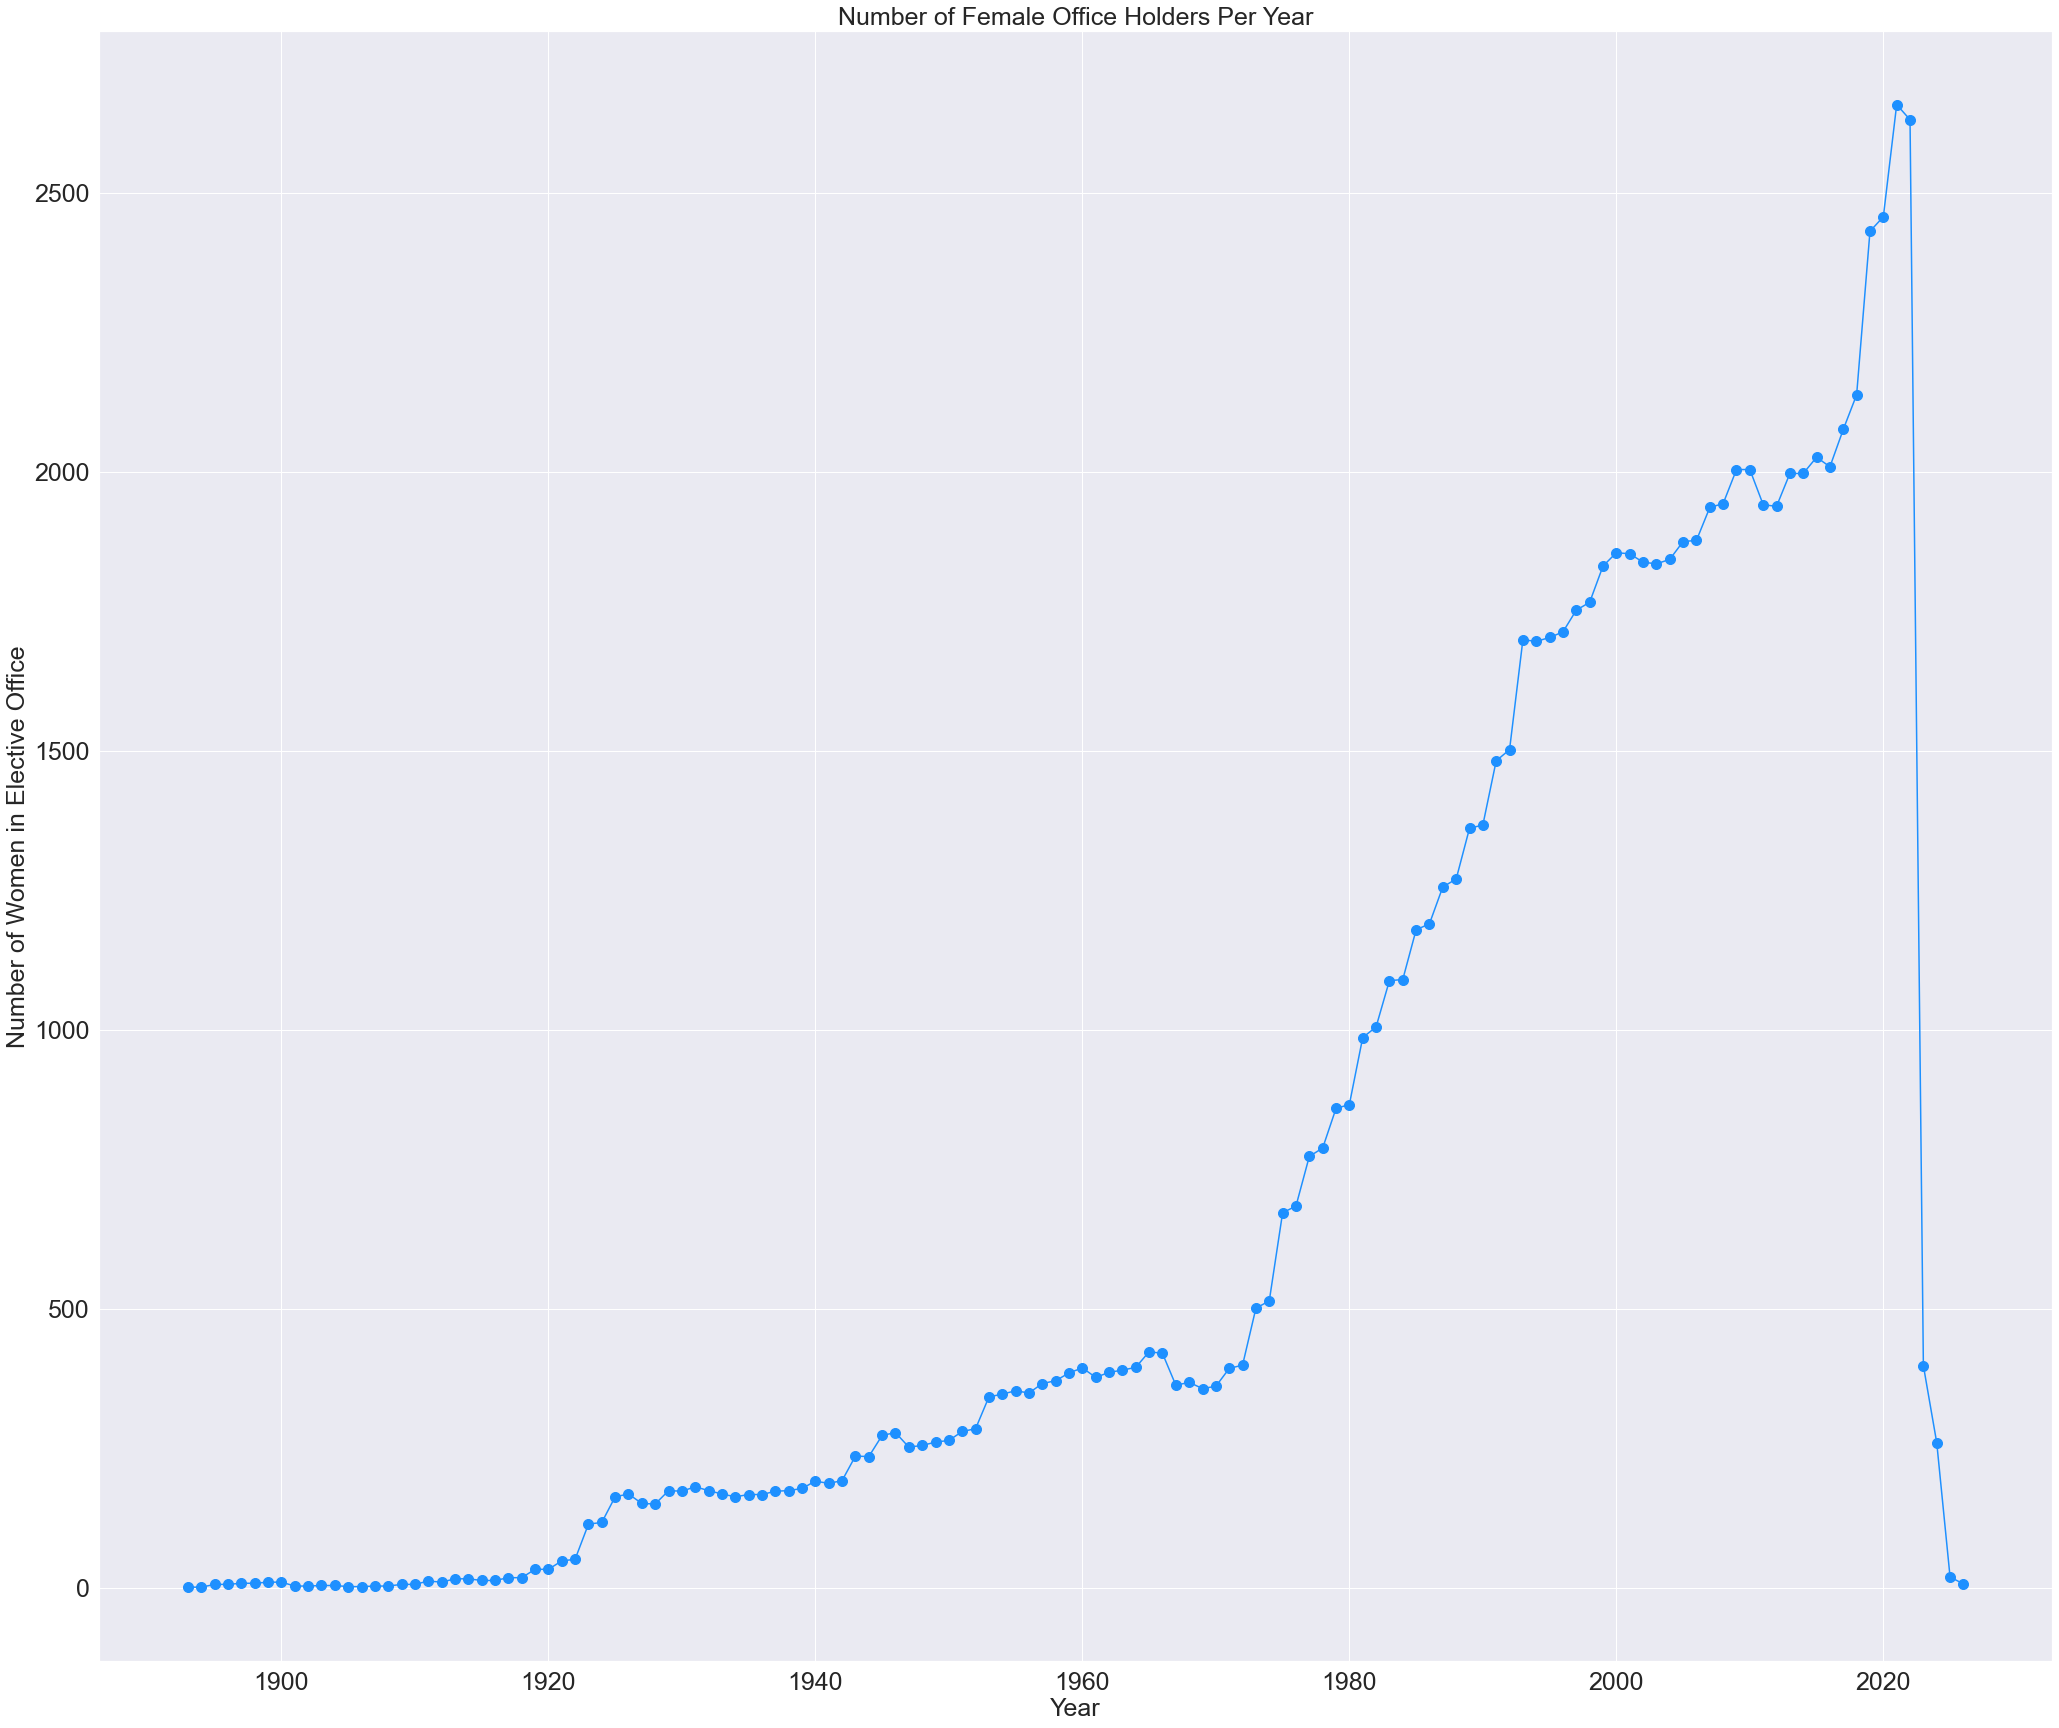

In [39]:
#number of female office holders per year
#line chart
df.groupby('Year')['ID'].count().plot(kind='line', marker='.', markersize=20, color='dodgerblue')
plt.rcParams["figure.figsize"] = (50,45)

plt.xlabel('Year', fontsize=25)
plt.ylabel('Number of Women in Elective Office', fontsize=25)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=0)

plt.title('Number of Female Office Holders Per Year', fontsize=25)
plt.show()

<b>Observations:</b> <br>
• There is a general upward trend in the numbers <br>
• There are some notable sharp upticks <br>
• There is a sudden downward jump after 2021. This is presumably because there are only a few positions certain to carry on into the future and there are many positions for individuals to yet be elected to

In [ ]:
df.groupby('Year')['ID'].count().plot(kind='bar', color='dodgerblue')
plt.rcParams["figure.figsize"] = (30,40)

plt.xlabel('Year', fontsize=25)
plt.ylabel('Number of Women in Elective Office', fontsize=25)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=90)

plt.title('Number of Female Office Holders Per Year', fontsize=30)
plt.show()

A very interesting observation to note here is the small uptick of female officeholders in the late 1890s, capping off at 1900 before going down in 1901. 

In [40]:
df.groupby('Year')['ID'].count().sort_values()

Year
1893       1
1894       1
1905       2
1906       2
1908       3
        ... 
2018    2138
2019    2431
2020    2457
2022    2631
2021    2658
Name: ID, Length: 134, dtype: int64

Thus, the smallest number of women who have ever held public office (not counting zero (0)) is 1 during the years of 1893 and 1894. Conversely, the largest number of women who have ever held public office is 2,658 in 2021.

## Length of Time Served

### Who Served The Longest?

In [41]:
df['ID'].value_counts()

15035h     55
14838h     52
199264k    50
11060h     46
195837k    46
           ..
659922k     1
796822k     1
14806c      1
14098h      1
14615c      1
Name: ID, Length: 12105, dtype: int64

In [42]:
id_55 = df[df['ID']=='15035h']
id_55.head()

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,race_ethnicity
58003,15035h,1987,Vicki,NaN,Miles-Lagrange,Democrat,State Legislative,State Senator,Oklahoma - OK,Black
58004,15035h,1986,Vicki,NaN,Miles-Lagrange,Democrat,State Legislative,State Senator,Oklahoma - OK,Black
58005,15035h,1985,Vicki,NaN,Miles-Lagrange,Democrat,State Legislative,State Senator,Oklahoma - OK,Black
58006,15035h,1984,Vicki,NaN,Miles-Lagrange,Democrat,State Legislative,State Senator,Oklahoma - OK,Black
58007,15035h,1983,Vicki,NaN,Miles-Lagrange,Democrat,State Legislative,State Senator,Oklahoma - OK,Black


In [43]:
id_55['Year'].max()

1987

In [44]:
id_55['Year'].min()

1933

Vicki Miles-Lagrange, a Black democratic state senator for Oklahoma, is the longest-serving female officeholder in the data set. She served for 55 years, from 1933 to 1987. 

### Average Years Served In Total

Can we calculate the average number of years served?

In [45]:
df['ID'].value_counts().mean()

7.789260636100785

The average number of years served by the officeholders in our dataset is 7.89 years. However, the above calculation is not accurate because the length of term for each position varies. It could also vary from state-to-state. Still, it is an interesting number to note. 

### Total & Average Years Served By Categories

#### By Position

In [46]:
pd.set_option("display.max_rows", None)
terms = df['ID'].groupby(by=df['Position']).value_counts()

In [48]:
terms.head()

Position     ID     
Agriculture  10393h     8
             2679c      8
             3143c      8
             196212k    7
             669727k    4
Name: ID, dtype: int64

Below is a visualization of the total number of years, <em>combined</em>, served by women in the various public office positions available in the dataset. 

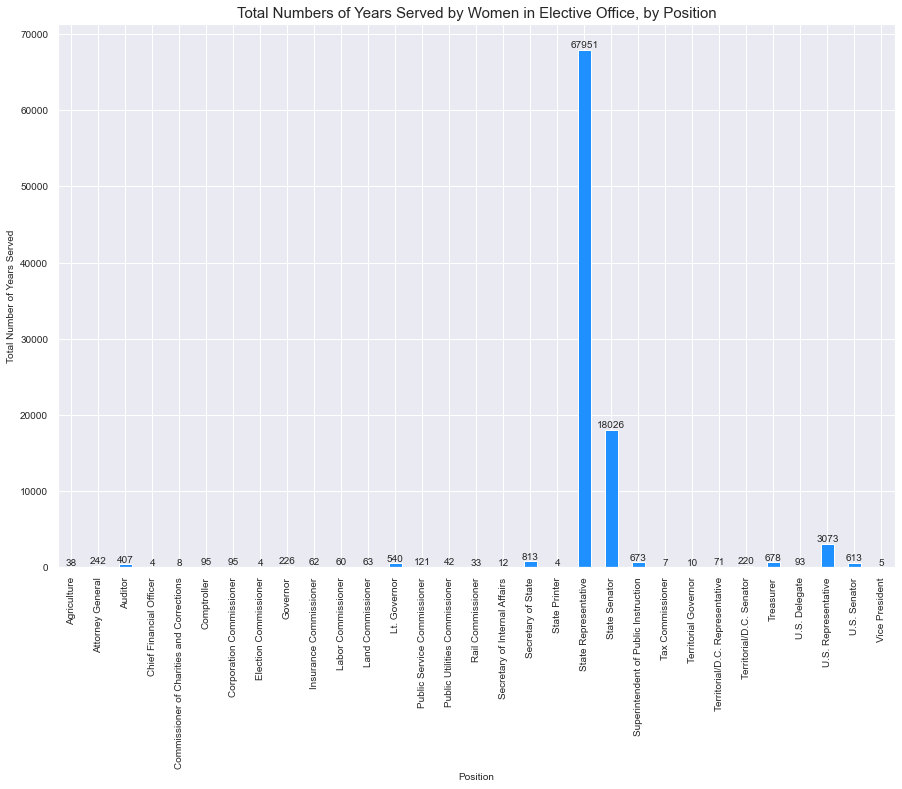

In [66]:
ax_terms = terms.groupby(by='Position').sum().plot(kind="bar", color='dodgerblue');

plt.rcParams["figure.figsize"] = (15,10)

plt.title("Total Numbers of Years Served by Women in Elective Office, by Position", fontsize=15)

ax_terms.bar_label(ax_terms.containers[0], fontsize=10);

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Total Number of Years Served', fontsize=10);
plt.xlabel('Position', fontsize=10);

plt.show()

Additionally, below is a visualization of the <em>average</em> number of years served by women in the same positions.

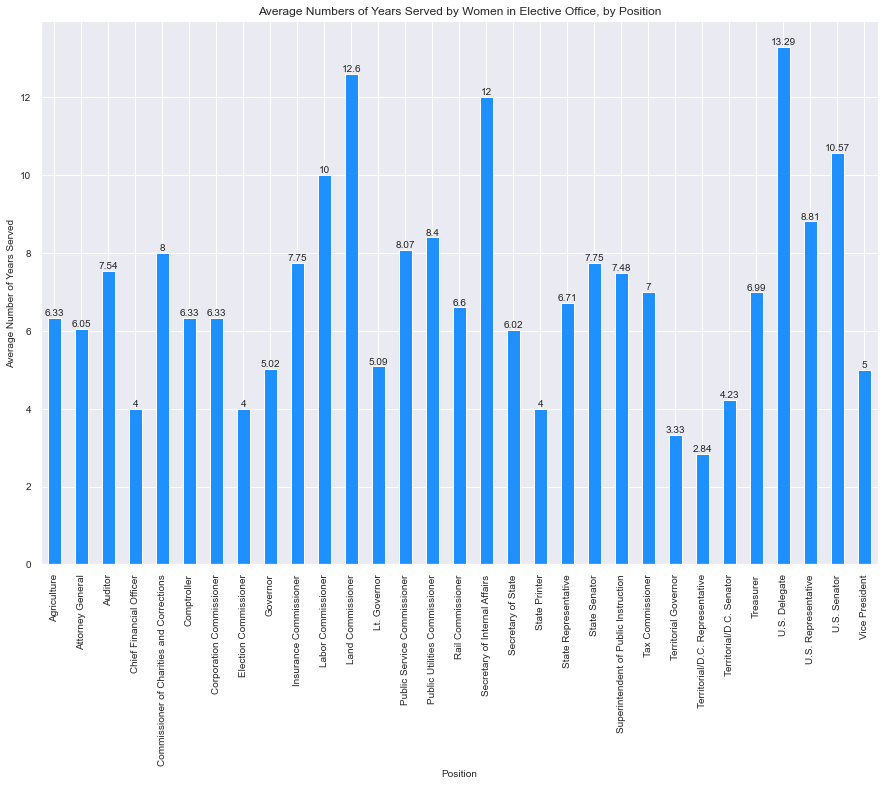

In [65]:
ax_terms2 = round(terms.groupby(by='Position').mean(), 2).plot(kind="bar", color='dodgerblue')

plt.rcParams["figure.figsize"] = (15,10)

plt.title("Average Numbers of Years Served by Women in Elective Office, by Position", fontsize=12)

plt.bar_label(ax_terms2.containers[0], fontsize=10);

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Average Number of Years Served', fontsize=10);
plt.xlabel('Position', fontsize=10);

Thus, the highest average number of years served in a particular position belongs to the U.S. Delegate position. Officeholders of this position are elected to represent the interests of a U.S. territory (<a href="https://en.wikipedia.org/wiki/Delegate_(American_politics)">1</a>). 
<br>
U.S. Delegates serve for two-year terms. There are 5 delegates and they serve as non-voting members of the House of Representatives (<a href="https://www.senate.gov/reference/reference_index_subjects/House_of_Representatives_vrd.htm">2</a>). 
<br><br>
This position is followed by the Land Commissioner and Secretary of Internal Affairs. Both positions are at the Statewide Executive level. 
<br>
Notably, the latter position has been filled by one particular person -- Genevieve Blatt, a democrat in Pennsylvania. Blatt served in the position from 1955 to 1966.

In [67]:
df[df['Position']=='Secretary of Internal Affairs']

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,race_ethnicity
6495,10235h,1955,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6496,10235h,1956,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6497,10235h,1957,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6498,10235h,1958,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6499,10235h,1959,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6500,10235h,1960,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6501,10235h,1961,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6502,10235h,1962,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6503,10235h,1963,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White
6504,10235h,1964,Genevieve,NaN,Blatt,Democrat,Statewide Executive,Secretary of Internal Affairs,Pennsylvania - PA,White


At the national level, women as U.S. Representatives served an average of 8.81 years and women as U.S. senators served an average of 10.57 years.

#### By Party

In [68]:
pd.set_option("display.max_rows", None)
parties = df['ID'].groupby(by=df['party']).value_counts()

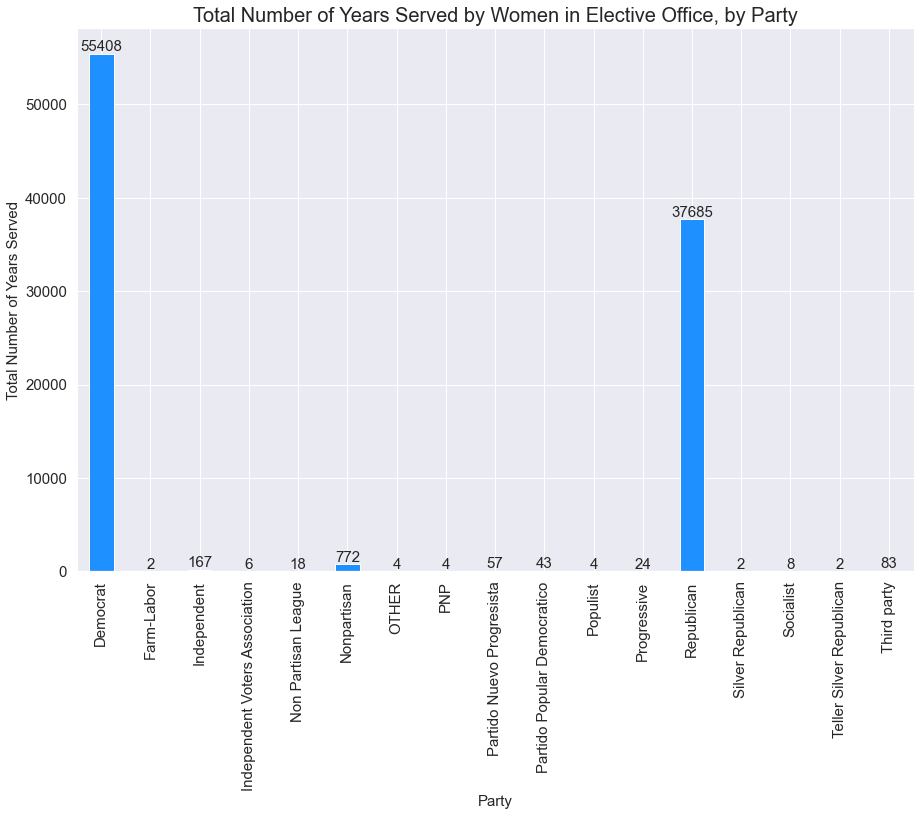

In [69]:
ax_parties = parties.groupby(by='party').sum().plot(kind="bar", color='dodgerblue');

plt.title("Total Number of Years Served by Women in Elective Office, by Party", fontsize=20)

plt.bar_label(ax_parties.containers[0], fontsize=15);

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Total Number of Years Served', fontsize=15);
plt.xlabel('Party', fontsize=15);

Unsurprisingly, the Democratic and Republican parties are the top 2 parties with the most number of combined years between them. 
<br>
Notably, however, is that there are more combined total years under the Nonpartisan label than in the Independent party. 

Below is a visualization of the <em>average</em> number of years served by women in the same parties.

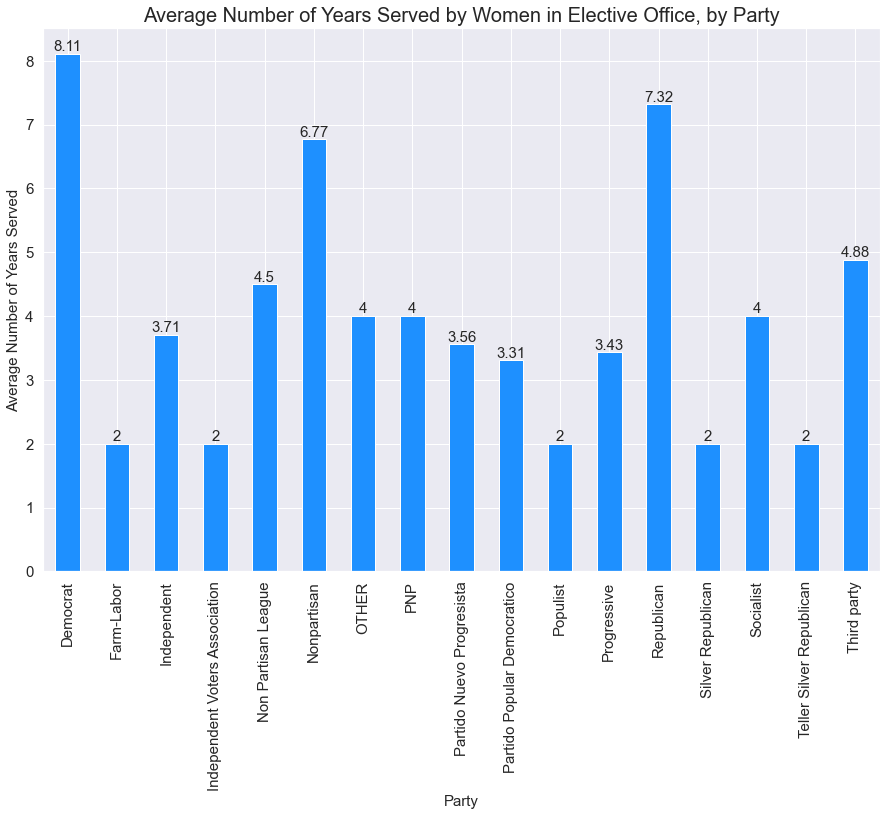

In [70]:
#avg 
ax_parties2 = round(parties.groupby(by='party').mean(), 2).plot(kind="bar", color='dodgerblue');

plt.title("Average Number of Years Served by Women in Elective Office, by Party", fontsize=20)

plt.bar_label(ax_parties2.containers[0], fontsize=15);

plt.yticks(fontsize=15, rotation=0);
plt.xticks(fontsize=15, rotation=90);

plt.ylabel('Average Number of Years Served', fontsize=15);
plt.xlabel('Party', fontsize=15);

Women in the Democratic party have served the longest average number of years, at 8.11 years. This is followed by Republican women in elective offices at 7.38 years and Nonpartisan at 6.77 years.

#### By Race/Ethnicity

In [71]:
pd.set_option("display.max_rows", None)
race_eth = df['ID'].groupby(by=df['race_ethnicity']).value_counts()

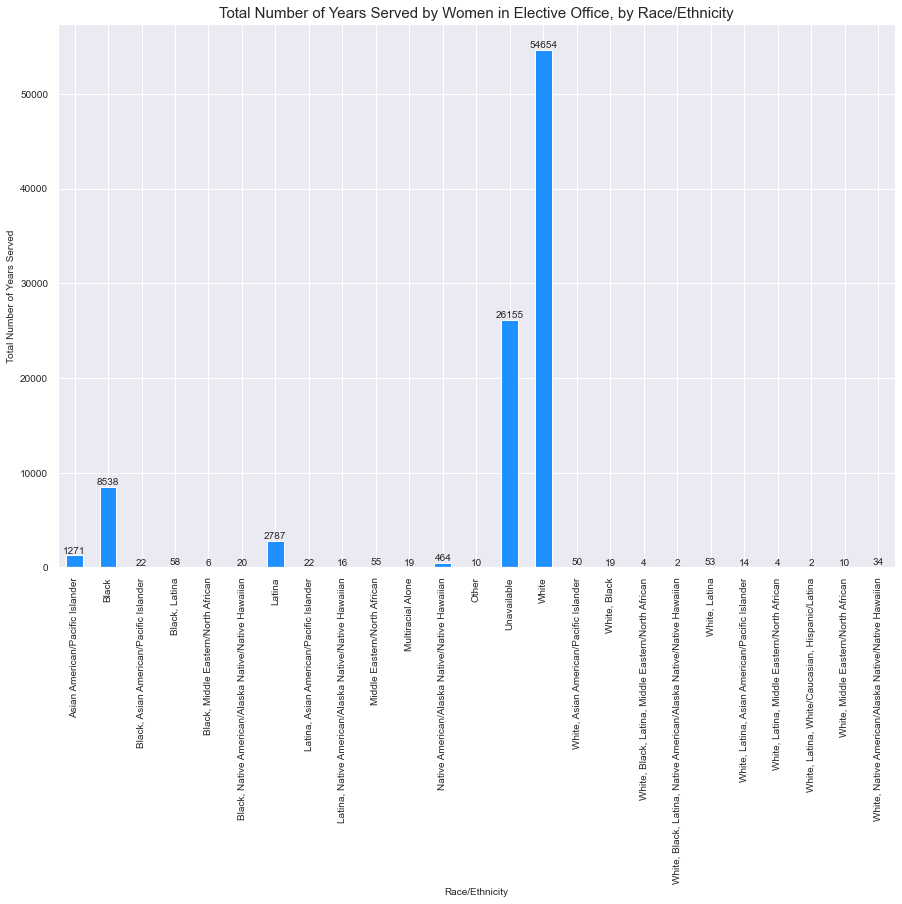

In [72]:
ax_rac_eth = race_eth.groupby(by='race_ethnicity').sum().plot(kind="bar", color='dodgerblue');

plt.title("Total Number of Years Served by Women in Elective Office, by Race/Ethnicity", fontsize=15)

plt.bar_label(ax_rac_eth.containers[0], fontsize=10);

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Total Number of Years Served', fontsize=10);
plt.xlabel('Race/Ethnicity', fontsize=10);

Women identiifying solely as White have served a combined total of 54,654 years in elective offices. Comparitively, women who identify only as Black have only served 8,538 years altogether. More on women of color:

In [73]:
df_woc = df.drop(df[df['race_ethnicity'] == 'White'].index)
df_woc = df_woc.drop(df_woc[df_woc['race_ethnicity'] == 'Unavailable'].index)

In [74]:
woc2 = df_woc['ID'].groupby(by=df['race_ethnicity']).value_counts()

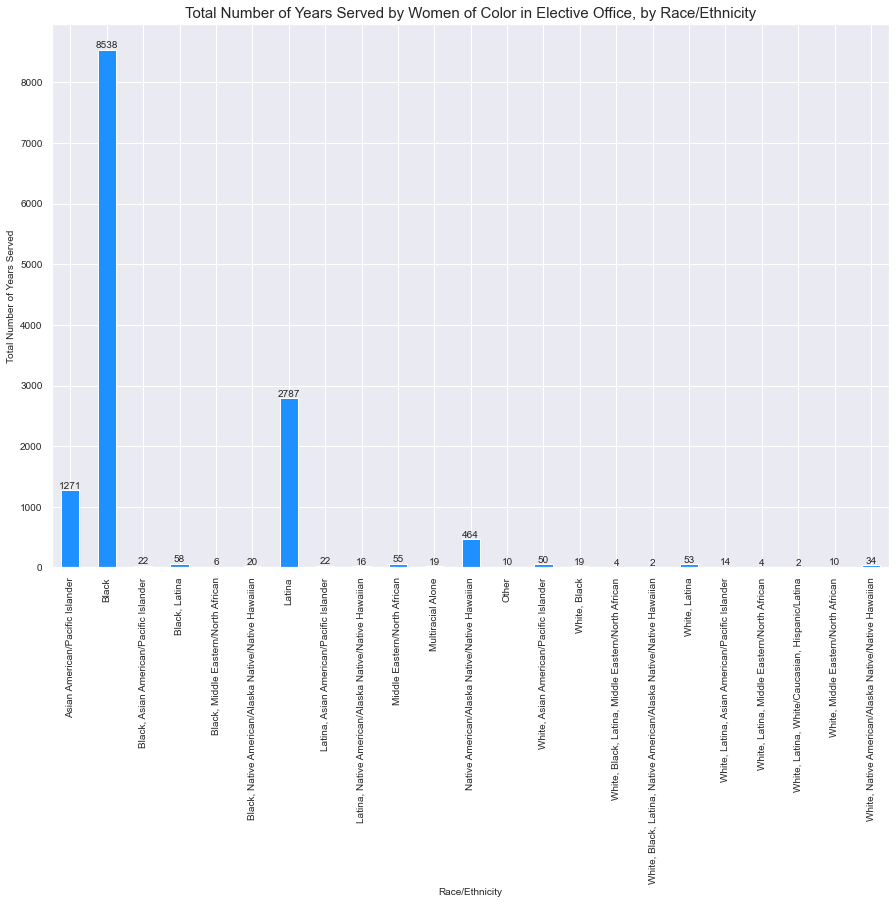

In [75]:
ax_woc2 = woc2.groupby(by='race_ethnicity').sum().plot(kind="bar", color='dodgerblue');

plt.title("Total Number of Years Served by Women of Color in Elective Office, by Race/Ethnicity", fontsize=15)

plt.bar_label(ax_woc2.containers[0], fontsize=10);

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Total Number of Years Served', fontsize=10);
plt.xlabel('Race/Ethnicity', fontsize=10);

Below is a visualization of the <em>average</em> number of years served by women of different races/ethnicities.

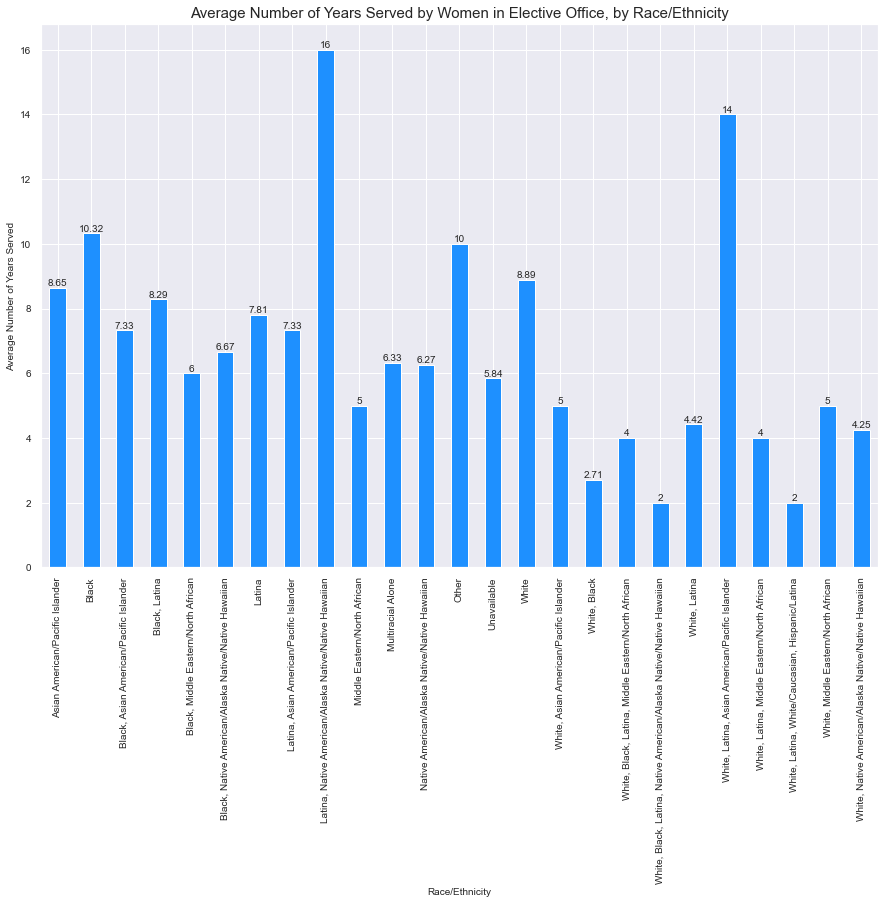

In [76]:
ax_rac_eth2 = round(race_eth.groupby(by='race_ethnicity').mean(), 2).plot(kind="bar", color='dodgerblue');

plt.title("Average Number of Years Served by Women in Elective Office, by Race/Ethnicity", fontsize=15)

plt.bar_label(ax_rac_eth2.containers[0], fontsize=10);

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Average Number of Years Served', fontsize=10);
plt.xlabel('Race/Ethnicity', fontsize=10);

Women who identified as "Latina, Native American/Alaska Native/Native Hawaiian" have the highest average number of years served in elective office, at 16 years. This is actually just one person: Sally Ann Gonzales. She was a Democratic state Representative in Arizona. See below:

In [77]:
df[df["race_ethnicity"]=="Latina, Native American/Alaska Native/Native Hawaiian"]

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,race_ethnicity
31327,192949k,2011,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31328,192949k,2012,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31329,192949k,2013,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31330,192949k,2014,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31331,192949k,2015,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31332,192949k,2016,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31333,192949k,2017,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31334,192949k,2018,Sally,Ann,Gonzales,Democrat,State Legislative,State Representative,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31335,192949k,2019,Sally,Ann,Gonzales,Democrat,State Legislative,State Senator,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."
31336,192949k,2020,Sally,Ann,Gonzales,Democrat,State Legislative,State Senator,Arizona - AZ,"Latina, Native American/Alaska Native/Native H..."


## 2022 (Currently In Office)

In [78]:
#create a new dataframe with information of officeholders only from 2021
df_2022 = df.loc[df['Year']==2022]

In [79]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2631 entries, 27 to 94288
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2631 non-null   object
 1   Year            2631 non-null   int64 
 2   First Name      2631 non-null   object
 3   Middle Name     1214 non-null   object
 4   Last Name       2631 non-null   object
 5   party           2631 non-null   object
 6   Level           2631 non-null   object
 7   Position        2631 non-null   object
 8   state           2630 non-null   object
 9   race_ethnicity  2631 non-null   object
dtypes: int64(1), object(9)
memory usage: 226.1+ KB


There are currently 2631 women holding office.

### 2022 By Party

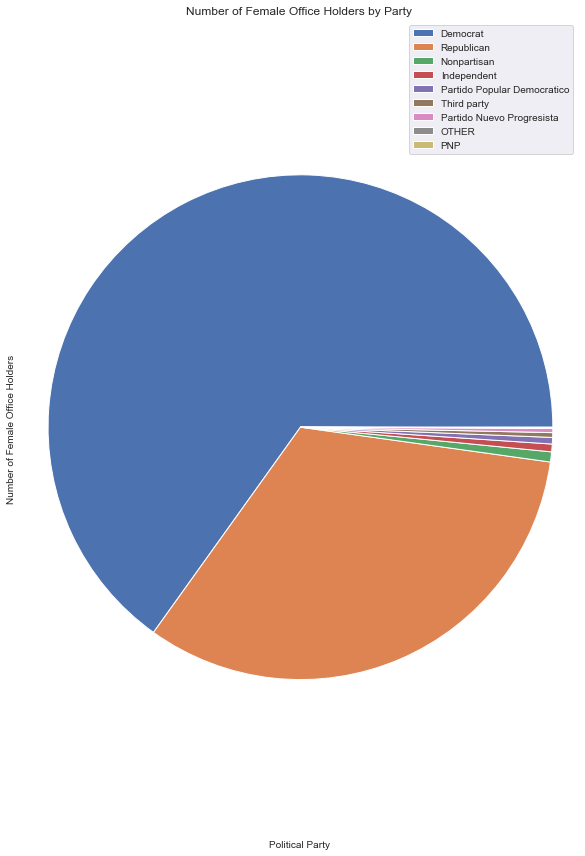

In [80]:
plt.rcParams["figure.figsize"] = [10, 15]

patches3, texts = plt.pie(df_2022['party'].value_counts())
plt.legend(patches3, df_2022['party'].value_counts().index, loc="best", fontsize=10)
plt.axis('equal')

plt.ylabel('Number of Female Office Holders', fontsize=10)
plt.xlabel('Political Party', fontsize=10)

plt.title("Number of Female Office Holders by Party", fontsize=12);

plt.show()

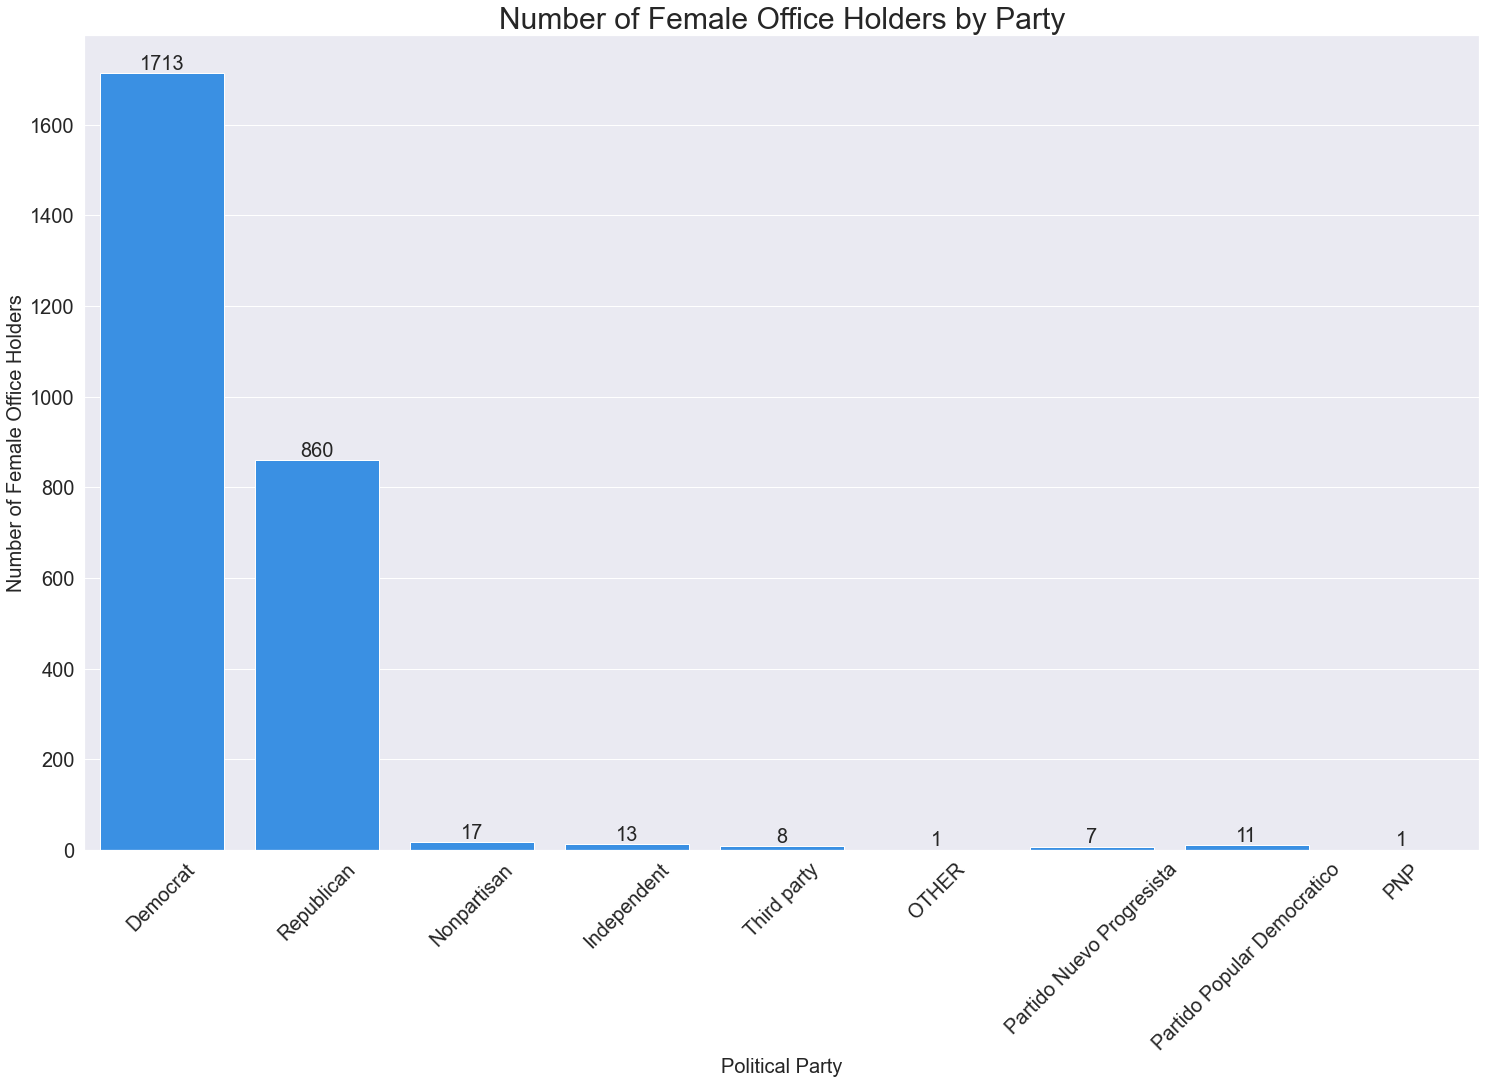

In [81]:
sns.set(rc={"figure.figsize":(25, 15)})
ax10 = sns.countplot(x=df_2022['party'], color='dodgerblue')

ax10.bar_label(ax10.containers[0], fontsize=20)

plt.yticks(fontsize=20, rotation=0);
plt.xticks(fontsize=20, rotation=45);

plt.ylabel('Number of Female Office Holders', fontsize=20)
plt.xlabel('Political Party', fontsize=20)

plt.title("Number of Female Office Holders by Party", fontsize=30);

Major percentage breakdowns:
<br> • 65.11% of current Democratic officeholders identify as women
<br> • 32.69% of current Republican officeholders identify as women
<br> • Other parties make up 2.20% of the current officeholders

### 2022 By Level

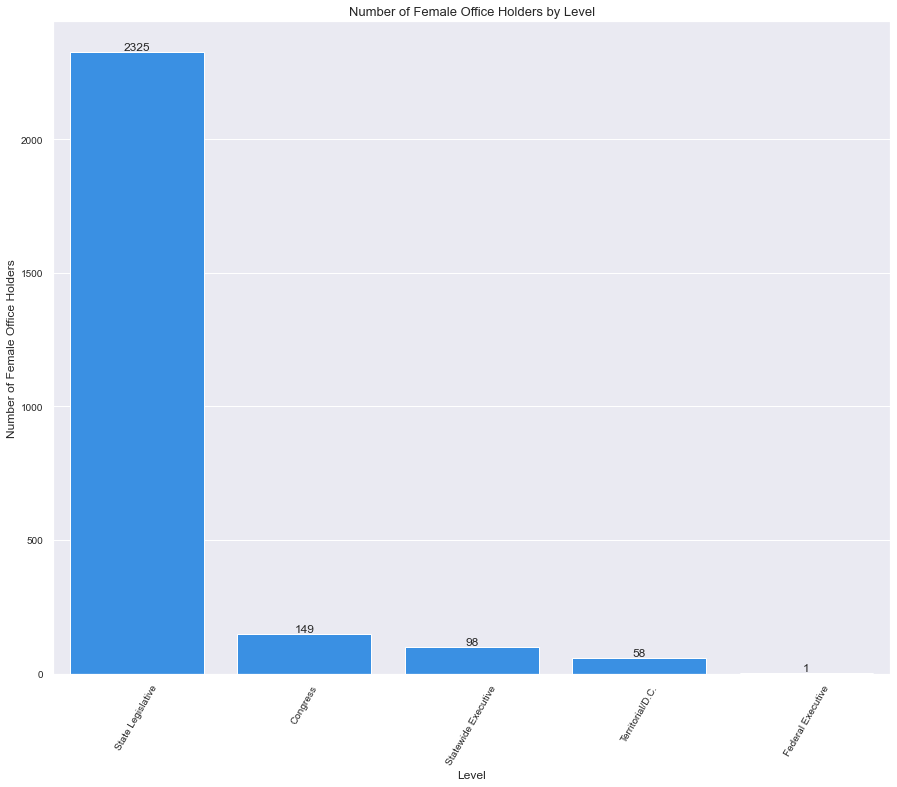

In [82]:
sns.set(rc={"figure.figsize":(15, 12)})

ax11 = sns.countplot(x=df_2022['Level'],color='dodgerblue')

ax11.bar_label(ax11.containers[0], fontsize=12)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=60);

plt.ylabel('Number of Female Office Holders', fontsize=12)
plt.xlabel('Level', fontsize=12)

plt.title("Number of Female Office Holders by Level", fontsize=13);

plt.show()

It is important to keep in mind that the total numbers of the state legislators, senators, etc. will be more than the total number of national representatives, etc. To that end, it is important to keep all of these numbers in perspective.

According to <a href="https://ballotpedia.org/State_legislative_elections,_2022">Ballotopedia</a>, updated up to May 12, 2022, there are 7,383 total seats at the state legislative level.
<br>
Thus, putting the state legislative bar in perspective:
<br>
• <b>31.49% of the total state legislative office holders identify as women</b>

There are a total of 535 member of Congress. Thus:
<br>
• <b>27.85% of the members of Congress identify as women</b>

#### Which States Currently Have Women as Senators?

In [83]:
us_sen22 = df_2022[df_2022['Position']=='U.S. Senator']

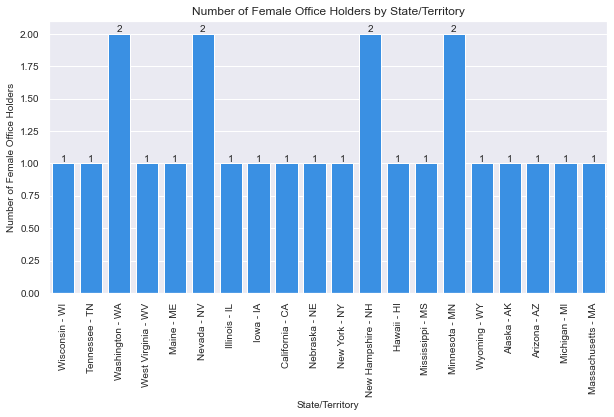

In [84]:
sns.set(rc={"figure.figsize":(10, 5)})

ax12 = sns.countplot(x=us_sen22['state'],color='dodgerblue')

ax12.bar_label(ax12.containers[0], fontsize=10)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=10)
plt.xlabel('State/Territory', fontsize=10)

plt.title("Number of Female Office Holders by State/Territory", fontsize=12);

Each state has 2 senators at the U.S. Senate. Washington, Nebraska, New Hampshire, and Minnesota all have both senators who are women.
<br> Notice that there are 20 states that aren't currently represented by women in the Senate.

#### Which States Currently Have Women as Representatives?

In [85]:
us_reps22 = df_2022[df_2022['Position']=='U.S. Representative']

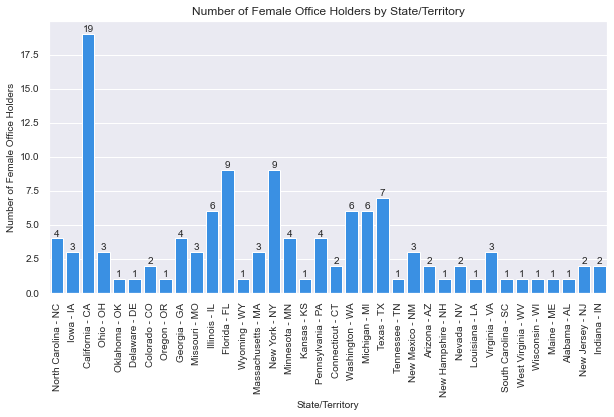

In [86]:
sns.set(rc={"figure.figsize":(10, 5)})

ax13 = sns.countplot(x=us_reps22['state'],color='dodgerblue')

ax13.bar_label(ax13.containers[0], fontsize=10)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=10)
plt.xlabel('State/Territory', fontsize=10)

plt.title("Number of Female Office Holders by State/Territory", fontsize=12);

In [87]:
us_reps22.head()

,ID,Year,First Name,Middle Name,Last Name,party,Level,Position,state,race_ethnicity
198,196595k,2022,Alma,S.,Adams,Democrat,Congress,U.S. Representative,North Carolina - NC,Black
2379,627442k,2022,Cindy,NaN,Axne,Democrat,Congress,U.S. Representative,Iowa - IA,White
3949,226476k,2022,Karen,R.,Bass,Democrat,Congress,U.S. Representative,California - CA,Black
4308,197852k,2022,Joyce,B.,Beatty,Democrat,Congress,U.S. Representative,Ohio - OH,Black
5830,495403k,2022,Stephanie,NaN,Bice,Republican,Congress,U.S. Representative,Oklahoma - OK,White


In [88]:
#list of total Representative seats by state in 2022
#From: https://www.house.gov/representatives
total_reps22 = [
    ['Alabama - AL', 7], 
    ['Alaska - AK', 1], 
    ['Arizona - AZ', 9], 
    ['Arkansas - AR', 4], 
    ['California - CA', 53], 
    ['Colorado - CO', 7], 
    ['Connecticut - CT', 5], 
    ['Delaware - DE', 1],
    ['Florida - FL', 27],
    ['Georgia - GA', 14],
    ['Hawaii - HI',2],
    ['Idaho - ID', 2],
    ['Illinois - IL', 18],
    ['Indiana - IN', 9],
    ['Iowa - IA', 4],
    ['Kansas - KS', 4],
    ['Kentucky - KY', 6],
    ['Louisiana - LA', 6],
    ['Maine - ME', 2],
    ['Maryland - MD', 8],
    ['Massachusetts - MA', 9],
    ['Michigan - MI', 14],
    ['Minnesota - MN', 8], 
    ['Mississippi', 4],
    ['Missouri - MO', 8],
    ['Montana - MT', 1],
    ['Nebraska - NE', 3],
    ['Nevada - NV', 4],
    ['New Hampshire - NH', 2],
    ['New Jersey - NJ', 12],
    ['New Mexico - NM', 3],
    ['New York - NY', 27],
    ['North Carolina - NC', 13],
    ['North Dakota - ND', 1],
    ['Ohio - OH', 16],
    ['Oklahoma - OK', 5],
    ['Oregon - OR', 5],
    ['Pennsylvania - PA', 18],
    ['Rhode Island - RI', 2],
    ['South Carolina - SC', 7],
    ['South Dakota - SD', 1],
    ['Tennessee - TN', 9],
    ['Texas - TX', 36],
    ['Utah - UT', 4],
    ['Vermont - VT', 1],
    ['Virginia - VA', 11],
    ['Washington - WA', 10],
    ['West Virginia - WV', 3],
    ['Wisconsin - WI', 8],
    ['Wyoming - WY', 1]
]

In [89]:
all_reps22 = pd.DataFrame(total_reps22)

In [90]:
all_reps22.rename(columns = {0:'state', 1:'Total_Reps'}, inplace = True)
all_reps22.head()

,state,Total_Reps
0,Alabama - AL,7
1,Alaska - AK,1
2,Arizona - AZ,9
3,Arkansas - AR,4
4,California - CA,53


In [91]:
val_counts = us_reps22['state'].value_counts().reset_index()

In [92]:
dfreps2 = pd.merge(all_reps22, val_counts, left_on=["state"], right_on=["index"], how="left")

In [93]:
dfreps2.head()

,state_x,Total_Reps,index,state_y
0,Alabama - AL,7,Alabama - AL,1.0
1,Alaska - AK,1,NaN,NaN
2,Arizona - AZ,9,Arizona - AZ,2.0
3,Arkansas - AR,4,NaN,NaN
4,California - CA,53,California - CA,19.0


We're gonna replace the "NaN" in 'state_y' with 0. 

In [94]:
dfreps2['state_y'] = dfreps2['state_y'].fillna(0)

In [95]:
#convert float column to integer column
dfreps2['state_y'] = dfreps2['state_y'].astype(int)

In [96]:
#change column names
dfreps2 = dfreps2.rename(columns={'state_x': 'State', 'state_y': 'Current_Reps'})

In [97]:
dfreps2.head()

,State,Total_Reps,index,Current_Reps
0,Alabama - AL,7,Alabama - AL,1
1,Alaska - AK,1,NaN,0
2,Arizona - AZ,9,Arizona - AZ,2
3,Arkansas - AR,4,NaN,0
4,California - CA,53,California - CA,19


In [98]:
#this is a column of the number of representatives from each state who don't identify as women
dfreps2['minus'] = dfreps2['Total_Reps'] - dfreps2['Current_Reps']

In [99]:
dfreps2.head()

,State,Total_Reps,index,Current_Reps,minus
0,Alabama - AL,7,Alabama - AL,1,6
1,Alaska - AK,1,NaN,0,1
2,Arizona - AZ,9,Arizona - AZ,2,7
3,Arkansas - AR,4,NaN,0,4
4,California - CA,53,California - CA,19,34


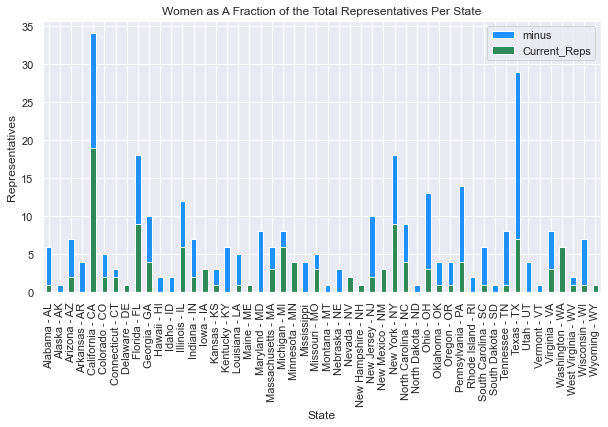

In [100]:
ax = dfreps2.plot(x="State", y="minus", kind="bar", color="dodgerblue")
dfreps2.plot(x="State", y="Current_Reps", kind="bar", ax=ax, color="seagreen")

ax.set_ylabel('Representatives')
ax.set_xlabel('State')

ax.set_title('Women as A Fraction of the Total Representatives Per State')

ax.legend()

plt.show()

### 2022 By Position

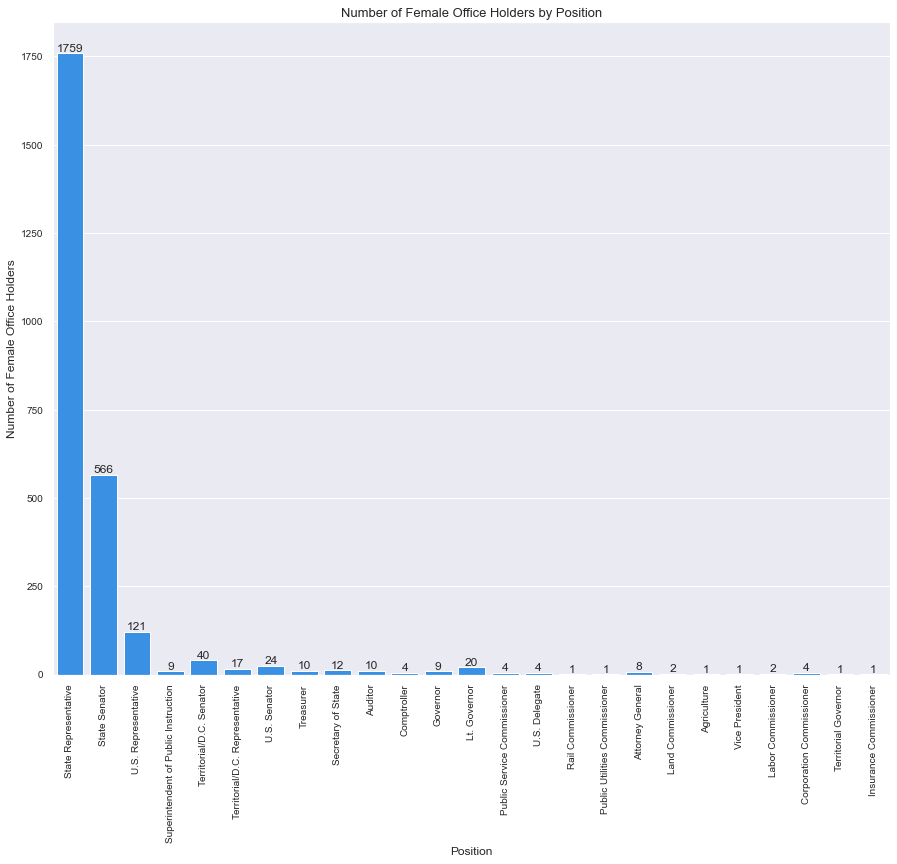

In [101]:
sns.set(rc={"figure.figsize":(15, 12)})

ax = sns.countplot(x=df_2022['Position'],color='dodgerblue')

ax.bar_label(ax.containers[0], fontsize=12)

plt.yticks(fontsize=10, rotation=0);
plt.xticks(fontsize=10, rotation=90);

plt.ylabel('Number of Female Office Holders', fontsize=12)
plt.xlabel('Position', fontsize=12)

plt.title("Number of Female Office Holders by Position", fontsize=13);

plt.show()

It is important to keep in mind that the total numbers of the state legislators, senators, etc. will be more than the total number of national representatives, etc. To that end, it is important to keep all of these numbers in perspective.

According to <a href="https://ballotpedia.org/State_legislative_elections,_2022">Ballotopedia</a>, updated up to May 12, 2022, of the 7,383 total seats at the state legislative level, there are 1,972 state senators (<a href="https://ballotpedia.org/Length_of_terms_of_state_senators">1</a>) and 5,411 state representatives (<a href=https://ballotpedia.org/Length_of_terms_of_state_representatives>2</a>). 
<br>
Thus, a percentage breakdown at the state legislative level, by position, would be:<br>
• <b>32.51% of the total state representatives identify as women<br>
• <b>28.70% of the total state senators identify as women

There are currently 100 senators and 435 voting representatives in office. 
<br> Thus, a percentage breakdown of the US Congress, by position, would be:<br>
• <b>27.82% of the total U.S. Representatives identify as women</b> <br>
• <b>24% of the total U.S. Senators identify as women</b>

## Names

In [102]:
df_unique['First Name'].value_counts().head()

Mary         463
Barbara      187
Susan        162
Elizabeth    162
Patricia     151
Name: First Name, dtype: int64

The most common first name appears to be "Mary" with 463 unique women using the name. This makes up <b>3.82%</b> of all the unique women in the dataset

In [103]:
df_unique['Last Name'].value_counts().head()

Smith      92
Johnson    77
Brown      69
Miller     61
Davis      54
Name: Last Name, dtype: int64

The most common last name is "Smith." This makes up <b>0.76%</b> of all the unique women in the dataset.

In [104]:
df_unique['Middle Name'].value_counts().sum()

7165

There are 7,165 women in the database who have middle names

## Conclusion

The "Women Elected Officials Database" from the Center for American Women and Politics at Rutgers contains 94,289 entries of all the women who have served in elective offices nationwide. Throughout the above report, multiple important observations and analyses were made. However, below is a summarized version of some of the key takeaways from this case study: <br><br>
• There were 12,105 unique women in the dataset from the 50 states and 5 territories, who have, in total, held public office for 134 years at 5 different levels, so far. <br>
<br>
• There are 17 political parties represented in this dataset <br>
• In total, the Democratic party seems to have the highest total number of women as office holders at 6,783.<br>
• There is a difference of 1,676 between Republican and Democratic parties.<br>
• There have been 32.8% more Democrat women who have hold office than Republican women.<br>
<br>
• There have been 360 unique women who have served in Congress over the years. Thus, that would be 2.9% of the total number of senators and representatives in U.S. history. <br>
• There have been 304 unique women who have served as U.S. Representatives and 49 who have served as U.S. Senators over the years. This also includes Delegates. Thus, that would be 2.7% of the total number of representatives and 2.4% of the total number of senators in U.S. history. <br>
<br>
• Among the 50 states of the US, we see that New Hampshire has elected the most number of women to hold public office. It is followed by Vermont, Connecticut, and Maine. Conversely, Alabama, Delaware and Nebraska have had the least number of female officeholders. <br>
• Among the territories, Puerto Rico has the highest representation of women in public office while D.C. has the lowest. <br>
• California has had the most number of women serve as U.S. Representatives, followed by New York, Florida and Illinois. The least number of women as U.S. Representatives have come from Iowa, Delaware, West Virginia, Wisconsin, Montana, Rhode Island, and Nebraska. <br>
<br>
• There were more White women (6193) who served in public office than any other race/ethnicity.
Notably, the second largest number belongs to the cateogry Unavailable. <br>
• The total number of women of color in this dataset is 1,507. That is 12.45% of the total women in the dataset. <br>
• Black female officeholders make up the largest majority of the women of color serving in public office at 850. This is followed by Latinas at 386, AAPI women at 164, Native American/Alaska Native/Native Hawaiian at 87, and MENA at 16. <br>
• There are 3 women who identify solely as Multiracial and 1 women who is categorized as Other. <br>
<br>
• There is a general upward trend in the number of women serving in elective offices over the years, with some sharp upticks along the way. <br>
• A notable observation is the small uptick of female officeholders in the late 1890s, capping off at 1900 before going down significantly in 1901. <br>
• The smallest number of women who have ever held public office (not counting zero (0)) is 1 during the years of 1893 and 1894. Conversely, the largest number of women who have ever held public office is 2,658 in 2021. <br>
• Vicki Miles-Lagrange, a Black democratic state senator for Oklahoma, is the longest-serving female officeholder in the data set. She served for 55 years, from 1933 to 1987. <br>
<br>
• The highest average number of years served in a particular position belongs to the U.S. Delegate position. This position is followed by the Land Commissioner and Secretary of Internal Affairs. Both positions are at the Statewide Executive level. <br>
• At the national level, women as U.S. Representatives served an average of 8.81 years and women as U.S. senators served an average of 10.57 years. <br>
<br>
• Democratic and Republican parties are the top 2 parties with the most number of combined years between them. Notably, however, is that there are more combined total years under the Nonpartisan label than in the Independent party. <br>
• Women in the Democratic party have served the longest average number of years, at 8.11 years. This is followed by Republican women in elective offices at 7.38 years and Nonpartisan at 6.77 years. <br>
• Women identiifying solely as White have served a combined total of 54,654 years in elective offices. Comparitively, women who identify only as Black have only served 8,538 years altogether. <br>
<br>
• There are currently 2631 women holding office.<br>
• 65.11% of current Democratic officeholders identify as women. 32.69% of current Republican officeholders identify as women. Other parties make up 2.20% of the current officeholders. <br>
• 31.49% of the total state legislative office holders identify as women. <br>
• 27.85% of the members of Congress identify as women. <br>
<br>
• Each state has 2 senators at the U.S. Senate. Washington, Nebraska, New Hampshire, and Minnesota all have both senators who are women. There are 20 states that aren't currently represented by women in the Senate.<br>
<br>
• Currently, 32.51% of the total state representatives identify as women and 28.70% of the total state senators identify as women. <br>
• Additionally, 27.82% of the total U.S. Representatives identify as women and 24% of the total U.S. Senators identify as women. <br>
<br>
• The most common first name appears to be "Mary" and the most common last name is "Smith." <br>
• There are 7,165 women in the database who have middle names